# Data Cleaning Performance Assessment

### John Foster
### Department of Information Technology, Western Governors University
### D206: Data Cleaning
### Professor Eric Straw
### April 5, 2023

### A: QUESTION OR DECISION

The research question I have decided to pursue using the churn dataset is as follows: "Across all variables in the dataset, which variables demonstrate the strongest correlation with a customer discontinuing service in a given month?" In effect, this question is one piece of a customer churn analysis, with the intention of gaining insight into which factors may be contributing to the organization's loss of customers. This would enable the organization to target these factors as they coordinate efforts to improve customer retention.

### B: REQUIRED VARIABLES

There are a total of 51 variables in this dataset, ranging considerably in function, data type, and expression. However, there are 52 total columns, with the very first column being functionally identical to the second. To best articulate the differences between our features, we can return them programmatically, along with their data types and examples of their expressions, and then elaborate on any feature-specific nuances worth noting before we begin our cleaning process. To do this, we will use the following code:

In [52]:
#Import the libraries that we need for our data cleaning processes.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import KNN
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
import scipy.stats as stats

In [53]:
#A simple variable to show or hide graphical visualizations for debugging purposes.
show_vis = 'y'

In [54]:
#Import the churn dataset from the source csv file and make a dataframe out of it.
raw_df = pd.read_csv('churn_raw_data.csv')

#Make a copy of the imported dataframe in case we would like to inspect or manipulate the raw data. 
#This allows us to manipulate our copy in place without making any other copies of the data.
df = raw_df.copy()

In [55]:
#Use the .info function to return information about each variable in the dataframe.

for col in df.columns:
    print('---')
    print('Variable name: ' + df[col].name)
    print('Data type: ' + str(df[col].dtype))
    i = df[col].values
    #j = i.to_series().groupby(i).count(5)
    print('Example values: ' + str(i))
    print('Notes:')

---
Variable name: Unnamed: 0
Data type: int64
Example values: [    1     2     3 ...  9998  9999 10000]
Notes:
---
Variable name: CaseOrder
Data type: int64
Example values: [    1     2     3 ...  9998  9999 10000]
Notes:
---
Variable name: Customer_id
Data type: object
Example values: ['K409198' 'S120509' 'K191035' ... 'I243405' 'I641617' 'T38070']
Notes:
---
Variable name: Interaction
Data type: object
Example values: ['aa90260b-4141-4a24-8e36-b04ce1f4f77b'
 'fb76459f-c047-4a9d-8af9-e0f7d4ac2524'
 '344d114c-3736-4be5-98f7-c72c281e2d35' ...
 'e8307ddf-9a01-4fff-bc59-4742e03fd24f'
 '3775ccfc-0052-4107-81ae-9657f81ecdf3'
 '9de5fb6e-bd33-4995-aec8-f01d0172a499']
Notes:
---
Variable name: City
Data type: object
Example values: ['Point Baker' 'West Branch' 'Yamhill' ... 'Mobeetie' 'Carrollton'
 'Clarkesville']
Notes:
---
Variable name: State
Data type: object
Example values: ['AK' 'MI' 'OR' ... 'TX' 'GA' 'GA']
Notes:
---
Variable name: County
Data type: object
Example values: ['Prince of 

#### If we edit the output to display correctly in markdown format, we can present the following orderly presentation of every variable and its associated information.

Variable name: Unnamed: 0
<br>Data type: int64
<br>Example values: [    1     2     3 ...  9998  9999 10000]
<br>Notes: This is an index column from the csv file not included in our data dictionary. It is being retained to preserve as much of the original data as possible, but essentially mirrors the CaseOrder column. Though its data type is numeric and it could be described as quantitative being an index of the data, it will not be processed with the rest of our data. 

<br>Variable name: CaseOrder
<br>Data type: int64
<br>Example values: [    1     2     3 ...  9998  9999 10000]
<br>Notes: This is a column of integers that functions as an index variable. Every value is unique, and it exists to preserve the original order of the rows in the dataset. This variable could be described as quantitative, being an index of the original order of the data.

<br>Variable name: Customer_id
<br>Data type: object
<br>Example values: ['K409198' 'S120509' 'K191035' ... 'I243405' 'I641617' 'T38070']
<br>Notes: These are unique ID's attached to customers of the organization. Although Pandas identifies them as objects, their values are strings, containing both numbers and letters. This variable could be described as qualitative, as it is not an expression of a direct measure.

<br>Variable name: Interaction
<br>Data type: object
<br>Example values: ['aa90260b-4141-4a24-8e36-b04ce1f4f77b'
 'fb76459f-c047-4a9d-8af9-e0f7d4ac2524'
 '344d114c-3736-4be5-98f7-c72c281e2d35' ...
 'e8307ddf-9a01-4fff-bc59-4742e03fd24f'
 '3775ccfc-0052-4107-81ae-9657f81ecdf3'
 '9de5fb6e-bd33-4995-aec8-f01d0172a499']
<br>Notes: These are unique ID's attached to the interactions between a customer and the organization. Although Pandas identifies them as objects, their values are strings, containing numbers, letters, and dashes. This variable could be described as qualitative, as it is not an expression of a direct measure.

<br>Variable name: City
<br>Data type: object
<br>Example values: ['Point Baker' 'West Branch' 'Yamhill' ... 'Mobeetie' 'Carrollton'
 'Clarkesville']
<br>Notes: For each customer ID, this variable represents their city of residence. Although Pandas identifies them as objects, their values are strings, containing letters, spaces, and various special characters. This variable could be described as qualitative, as it is not an expression of a direct measure.

<br>Variable name: State
<br>Data type: object
<br>Example values: ['AK' 'MI' 'OR' ... 'TX' 'GA' 'GA']
<br>Notes: For each customer ID, this value represents their state of residence. Although Pandas identifies them as objects, their values are strings, containing 2 capital letters corresponding to standard state abbreviations. There are actually 52 unique values, as this dataset includes the District of Columbia and Puerto Rico. This variable could be described as qualitative, as it is not an expression of a direct measure.

<br>Variable name: County
<br>Data type: object
<br>Example values: ['Prince of Wales-Hyder' 'Ogemaw' 'Yamhill' ... 'Wheeler' 'Carroll'
 'Habersham']
<br>Notes: For each customer ID, this value represents their county of residence. These values include state-specific census areas, including boroughs in Alaska and parishes in Louisiana. Although Pandas identifies them as objects, their values are strings, containing letters, spaces, and various special characters. This variable could be described as qualitative, as it is not an expression of a direct measure.

<br>Variable name: Zip
<br>Data type: int64
<br>Example values: [99927 48661 97148 ... 79061 30117 30523]
<br>Notes: For each customer ID, this value represents their postal zip code. Although Pandas identifies them as 64-bit integers and they only contain numbers, they are not a direct incremental measure of a value, and cannot be treated in the same way as other numeric variables. This variable could be described as qualitative, as it is not an expression of a direct measure.

<br>Variable name: Lat
<br>Data type: float64
<br>Example values: [56.251   44.32893 45.35589 ... 35.52039 33.58016 34.70783]
<br>Notes: For each customer ID, this value represents the geographic latitude of their residence. Pandas identifies them as 64-bit floats, and they will be treated as numeric columns during processing. This variable could be described as quantitative, as it is a direct measure of how far north or south a geographic location is.

<br>Variable name: Lng
<br>Data type: float64
<br>Example values: [-133.37571  -84.2408  -123.24657 ... -100.4418   -85.13241  -83.53648]
<br>Notes: For each customer ID, this value represents the geographic longitude of their residence. Pandas identifies them as 64-bit floats, and they will be treated as numeric columns during processing. This variable could be described as quantitative, as it is a direct measure of how far east or west a geographic location is.

<br>Variable name: Population
<br>Data type: int64
<br>Example values: [   38 10446  3735 ...   406 35575 12230]
<br>Notes: For each customer ID, this value represents the population per square mile within the customer's census area. Pandas identifies them as 64-bit integers, and they will be treated as numeric columns during processing. This variable could be described as quantitative, as it is a calculated measure of how populated a census area is.

<br>Variable name: Area
<br>Data type: object
<br>Example values: ['Urban' 'Urban' 'Urban' ... 'Rural' 'Urban' 'Urban']
<br>Notes: For each customer ID, this value's category represents the classification of a customer's area of residence. Pandas identifies them as objects, but they are expressed as strings and are categorical. There are a total of three categories for this feature. This variable could be described as qualitative, as it is not an expression of a direct measure.

<br>Variable name: Timezone
<br>Data type: object
<br>Example values: ['America/Sitka' 'America/Detroit' 'America/Los_Angeles' ...
 'America/Chicago' 'America/New_York' 'America/New_York']
<br>Notes: For each customer ID, this value represents the timezone in which the customer resides. Pandas identifies them as objects, but they are expressed as strings and are categorical. This variable could be described as qualitative, as it is not an expression of a direct measure, and does not even directly correlate to longitude due to the often arbitrary geographic boundaries of timezones.

<br>Variable name: Job
<br>Data type: object
<br>Example values: ['Environmental health practitioner' 'Programmer, multimedia'
 'Chief Financial Officer' ... 'IT technical support officer'
 'Water engineer' 'Personal assistant']
<br>Notes: For each customer ID, this value represents the customer's occupation. Pandas identifies them as objects, but they are expressed as strings. This variable could be described as qualitative, as it is not an expression of a direct measure.

<br>Variable name: Children
<br>Data type: float64
<br>Example values: [nan  1.  4. ... nan  1.  1.]
<br>Notes: For each customer ID, this value represents the number of children that the customer has. Pandas identifies them as 64-bit floats, but they should actually be regarded as integers. This variable could be described as quantitative, as it is a direct numeric measure.

<br>Variable name: Age
<br>Data type: float64
<br>Example values: [68. 27. 50. ... nan 39. 28.]
<br>Notes: For each customer ID, this value represents the customer's age in years. Pandas identifies them as 64-bit floats, but they should actually be regarded as integers. This variable could be described as quantitative, as it is a direct numeric measure.

<br>Variable name: Education
<br>Data type: object
<br>Example values: ["Master's Degree" 'Regular High School Diploma'
 'Regular High School Diploma' ... 'Nursery School to 8th Grade'
 "Bachelor's Degree" 'GED or Alternative Credential']
<br>Notes: For each customer ID, this value represents the highest level of education completed by the customer. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: Employment
<br>Data type: object
<br>Example values: ['Part Time' 'Retired' 'Student' ... 'Full Time' 'Full Time' 'Full Time']
<br>Notes: For each customer ID, this value represents the customer's employment and career status. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: Income
<br>Data type: float64
<br>Example values: [28561.99 21704.77      nan ...      nan 16667.58      nan]
<br>Notes: For each customer ID, this value represents the customer's salary in dollars. Pandas identifies them as 64-bit floats, so that they can express both dollars and cents. This variable could be described as quantitative, as it is a direct numeric measure.

<br>Variable name: Marital
<br>Data type: object
<br>Example values: ['Widowed' 'Married' 'Widowed' ... 'Never Married' 'Separated'
 'Never Married']
<br>Notes: For each customer ID, this value represents the customer's marital status. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: Gender
<br>Data type: object
<br>Example values: ['Male' 'Female' 'Female' ... 'Female' 'Male' 'Male']
<br>Notes: For each customer ID, this value represents the customer's declared gender. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: Churn
<br>Data type: object
<br>Example values: ['No' 'Yes' 'No' ... 'No' 'No' 'No']
<br>Notes: For each customer ID, this value represents whether or not the customer discontinued service in the past month. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: Outage_sec_perweek
<br>Data type: float64
<br>Example values: [ 6.97256609 12.01454108 10.24561565 ...  4.837696   12.07646
 12.64176   ]
<br>Notes: For each customer ID, this value represents the average number of seconds per week that the customer experiences service outages in their location. Pandas identifies them as 64-bit floats. This variable could be described as quantitative, as it is a direct numeric measure.

<br>Variable name: Email
<br>Data type: int64
<br>Example values: [10 12  9 ... 10 14 17]
<br>Notes: For each customer ID, this value represents the number of emails sent to the customer by the organization. Pandas identifies them as 64-bit integers. This variable could be described as quantitative, as it is a direct numeric measure.

<br>Variable name: Contacts
<br>Data type: int64
<br>Example values: [0 0 0 ... 0 1 1]
<br>Notes: For each customer ID, this value represents the number of instances where the customer contacted customer support. Pandas identifies them as 64-bit integers. This variable could be described as quantitative, as it is a direct numeric measure.

<br>Variable name: Yearly_equip_failure
<br>Data type: int64
<br>Example values: [1 1 1 ... 0 0 0]
<br>Notes: For each customer ID, this value represents the number of instances where the customer experienced service-related equipment failure. Pandas identifies them as 64-bit integers. This variable could be described as quantitative, as it is a direct numeric measure.

<br>Variable name: Techie
<br>Data type: object
<br>Example values: ['No' 'Yes' 'Yes' ... 'No' 'No' nan]
<br>Notes: For each customer ID, this value represents whether or not the customer identifies as technologically-inclined. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: Contract
<br>Data type: object
<br>Example values: ['One year' 'Month-to-month' 'Two Year' ... 'Month-to-month' 'Two Year'
 'Month-to-month']
<br>Notes: For each customer ID, this value represents the type of contract that the customer has with the organization. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: Port_modem
<br>Data type: object
<br>Example values: ['Yes' 'No' 'Yes' ... 'No' 'No' 'Yes']
<br>Notes: For each customer ID, this value represents whether or not the customer utilizes a portable modem for service. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: Tablet
<br>Data type: object
<br>Example values: ['Yes' 'Yes' 'No' ... 'No' 'Yes' 'No']
<br>Notes: For each customer ID, this value represents whether or not the customer is a tablet user. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: InternetService
<br>Data type: object
<br>Example values: ['Fiber Optic' 'Fiber Optic' 'DSL' ... 'Fiber Optic' 'Fiber Optic'
 'Fiber Optic']
<br>Notes: For each customer ID, this value represents the type of internet service that the customer uses. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: Phone
<br>Data type: object
<br>Example values: ['Yes' 'Yes' 'Yes' ... 'Yes' 'No' 'Yes']
<br>Notes: For each customer ID, this value represents whether or not the customer has phone service. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: Multiple
<br>Data type: object
<br>Example values: ['No' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
<br>Notes: For each customer ID, this value represents whether or not the customer has more than one phone line. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: OnlineSecurity
<br>Data type: object
<br>Example values: ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'Yes']
<br>Notes: For each customer ID, this value represents whether or not the customer subscribes to online security services. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: OnlineBackup
<br>Data type: object
<br>Example values: ['Yes' 'No' 'No' ... 'Yes' 'No' 'Yes']
<br>Notes: For each customer ID, this value represents whether or not the customer subscribes to online data backup services. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: DeviceProtection
<br>Data type: object
<br>Example values: ['No' 'No' 'No' ... 'No' 'No' 'Yes']
<br>Notes: For each customer ID, this value represents whether or not the customer subscribes to device protection services. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: TechSupport
<br>Data type: object
<br>Example values: ['No' 'No' 'No' ... 'No' 'Yes' 'No']
<br>Notes: For each customer ID, this value represents whether or not the customer subscribes to technical support services. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: StreamingTV
<br>Data type: object
<br>Example values: ['No' 'Yes' 'No' ... 'No' 'Yes' 'No']
<br>Notes: For each customer ID, this value represents whether or not the customer subscribes to television streaming services. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: StreamingMovies
<br>Data type: object
<br>Example values: ['Yes' 'Yes' 'Yes' ... 'No' 'Yes' 'Yes']
<br>Notes: For each customer ID, this value represents whether or not the customer subscribes to movie steaming services. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: PaperlessBilling
<br>Data type: object
<br>Example values: ['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
<br>Notes: For each customer ID, this value represents whether or not the customer uses the organization's paperless billing services. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: PaymentMethod
<br>Data type: object
<br>Example values: ['Credit Card (automatic)' 'Bank Transfer(automatic)'
 'Credit Card (automatic)' ... 'Bank Transfer(automatic)'
 'Credit Card (automatic)' 'Electronic Check']
<br>Notes: For each customer ID, this value represents the customer's method of payment. Pandas identifies them as objects, but they are expressed as strings and are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure.

<br>Variable name: Tenure
<br>Data type: float64
<br>Example values: [ 6.79551295  1.156681   15.75414408 ...         nan 71.0956
 63.35086   ]
<br>Notes: For each customer ID, this value represents the total number of months that the customer has received services from the organization. Pandas identifies them as 64-bit floats. This variable could be described as quantitative, as it is a direct numeric measure.

<br>Variable name: MonthlyCharge
<br>Data type: float64
<br>Example values: [171.4497621 242.9480155 159.4403984 ... 168.2209    252.6286
 218.371    ]
<br>Notes: For each customer ID, this value represents the average amount that the customer pays every month in dollars. Pandas identifies them as 64-bit floats. This variable could be described as quantitative, as it is a direct numeric measure.

<br>Variable name: Bandwidth_GB_Year
<br>Data type: float64
<br>Example values: [ 904.5361102  800.9827661 2054.706961  ... 4159.306     6468.457
 5857.586    ]
<br>Notes: For each customer ID, this value represents the average number of gigabytes of bandwidth that the customer utilizes in a year. Pandas identifies them as 64-bit floats. This variable could be described as quantitative, as it is a direct numeric measure.

<br>Variable name: item1
<br>Data type: int64
<br>Example values: [5 3 4 ... 4 4 2]
<br>Notes: For each customer ID, this value represents the customer's response to an organizational survey question, rating the importance of timely responses in customer service interactions. Pandas identifies them as 64-bit integers and they are expressed as such, but they are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure, despite how it is expressed in the data.

<br>Variable name: item2
<br>Data type: int64
<br>Example values: [5 4 4 ... 4 4 2]
<br>Notes: For each customer ID, this value represents the customer's response to an organizational survey question, rating the importance of timely fixes in customer service interactions. Pandas identifies them as 64-bit integers and they are expressed as such, but they are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure, despite how it is expressed in the data.

<br>Variable name: item3
<br>Data type: int64
<br>Example values: [5 3 2 ... 4 6 3]
<br>Notes: For each customer ID, this value represents the customer's response to an organizational survey question, rating the importance of timely equipment replacements in customer service interactions. Pandas identifies them as 64-bit integers and they are expressed as such, but they are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure, despite how it is expressed in the data.

<br>Variable name: item4
<br>Data type: int64
<br>Example values: [3 3 4 ... 4 4 3]
<br>Notes: For each customer ID, this value represents the customer's response to an organizational survey question, rating the importance of perceived reliability from a customer's perspective. Pandas identifies them as 64-bit integers and they are expressed as such, but they are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure, despite how it is expressed in the data.

<br>Variable name: item5
<br>Data type: int64
<br>Example values: [4 4 4 ... 4 3 3]
<br>Notes: For each customer ID, this value represents the customer's response to an organizational survey question, rating the importance of having options from a customer perspective. Pandas identifies them as 64-bit integers and they are expressed as such, but they are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure, despite how it is expressed in the data.

<br>Variable name: item6
<br>Data type: int64
<br>Example values: [4 3 3 ... 4 3 3]
<br>Notes: For each customer ID, this value represents the customer's response to an organizational survey question, rating the importance of respectful response in customer service interactions. Pandas identifies them as 64-bit integers and they are expressed as such, but they are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure, despite how it is expressed in the data.

<br>Variable name: item7
<br>Data type: int64
<br>Example values: [3 4 3 ... 4 5 4]
<br>Notes: For each customer ID, this value represents the customer's response to an organizational survey question, rating the importance of courteous exchange in customer service interactions. Pandas identifies them as 64-bit integers and they are expressed as such, but they are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure, despite how it is expressed in the data.

<br>Variable name: item8
<br>Data type: int64
<br>Example values: [4 4 3 ... 5 4 1]
<br>Notes: For each customer ID, this value represents the customer's response to an organizational survey question, rating the importance of evidence of active listening in customer service interactions. Pandas identifies them as 64-bit integers and they are expressed as such, but they are handled as categorical variables. This variable could be described as qualitative, as it is not a direct numeric measure, despite how it is expressed in the data.

In [56]:
#Inspect the data types of each feature of the data so we can preprocess any data types 
# that might raise errors in our statistical and visualization functions
print(df.info())
print('--------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

### C1: PLAN TO ASSESS QUALITY OF DATA

There are several different factors to evaluate when assessing the quality of a dataset. The first factor we will explore is simply whether or not the data contains any obvious mistakes made during data entry. To do this, we will simply look at the unique values of every feature, excluding those that are meant to be unique to each row, and see if we find any anomalies such as a clearly mistyped category name or any value in a survey response column that is not an integer from 1 to 8. 

The second factor we will assess is whether or not the data contains duplicate rows. We will do this by comparing all rows in the dataframe, and then go farther by comparing the different values in the Customer_id and Interaction columns individually. The number of duplicates present in our dataset will then inform our decisions about how to mitigate this data quality issue. 

Next, we will begin assessing our natively numeric columns for certain anomalies based on our understanding of their expected values and develop plans to mitigate them according to our findings. Some of these potential data quality detection methods will be applied to multiple features, and some will be feature specific. We will search all numeric columns for negative values, for example, and then assess whether the results indicate a data quality issue for each feature. We may expect negative longitudinal values in every row, for example, but we should not expect negative values in a feature such as Outage_sec_perweek. We will also search for numeric values of 0 in our Population column, as this would be another unexpected result worth evaluating. Next, we will briefly explore the minimum and maximum values of our Lat and Lng columns, and then compare the pairs of both values from the returned with that row's City to make sure that they appear to be consistent with our expectations of the geographical region. 

Once we have explored these feature-specific factors, we can move onto assessing our data for missingness. We will do this by evaluating the number of missing values in all of our columns, both numeric and otherwise. Based on how much of the total data is missing for different features, and the data types of the affected features, we will then decide which approach is most appropriate for mitigating the missingness of different features.

After having assessed our data for missingness, we will have an important decision to make regarding whether to assess our quantitative data for outliers before or after executing our mitigation strategies for missingness in the data. If we assess for outliers before imputation in a feature with a high degree of missingness, we risk committing to outlier mitigation strategies that will not be appropriate for the feature based on its distribution after imputation. For example, if our data is missing 25% of values and we evaluate for outliers before imputing, our outlier detection might return an altogether different sum of total outliers. Based on that, if we were to choose to simply drop the rows containing outliers for that feature because of their quantity or values, we might drop data that we didn't intend to drop when we execute that code after imputation, or even miss certain outliers that skew analyses performed on our cleaned data. Because of these considerations, we will choose to wait until after we have imputed for missingness to evaluate our data for outliers. We will still provide the appropriate working code to assess for outliers in section C4 for demonstration purposes, but we will change the resulting variables so that any output is isolated and does not affect our ability to assess at the appropriate time in the data cleaning process. Regarding outlier handling methodology, we will be creating and visualizing z-score box plots for each numeric feature and storing the corresponding z-score values in a separate dataframe for ease of reference and data manipulation during our mitigation procedures. We have elected to use z-scores because they can be applied appropriately to quantitative data that directly measures basically any metric or unit because they are based upon the mean of the data and correspond to how many standard deviations from the mean a given value is (Larose & Larose, 2019, p. 40). This makes them effective for consistently detecting statistical outliers using programmatic comparisons, making them ideal for scripted, redeployable, and scalable cleaning procedures.

### C2: JUSTIFICATION OF APPROACH

Most of our plan for assessing data quality is open-ended by design. We can reasonably expect to develop strategies to handle duplicates, missing data, outliers, and a few potential feature-specific pitfalls, but we should not know exactly how best to do that without looking at the data. There are multiple mitigation strategies for each aspect of the data cleaning process, and they are highly contextual. Although we can make broad plans at the outset of the process, a majority of the planning we are doing at this stage is rooted in exploring the data itself and allowing our observations to inform our decision making regarding appropriate mitigation methods. Based on our current understanding of the variables, we have to account for dissimilar data types, including both qualitative and quantitative data, categorical variables that both can or cannot logically ordered, and a lack of filtering for irrelevant or overlapping data. In short, while there appears to be a large quantity of data available for analysis, we know very little outside of what the data dictionary has told us at this point. Suspending our decisions until we can learn more allows us to select the best tools for each step of the data cleaning process, and allows the cleaned data to tell a more accurate story during analysis.

With this said, we are not altogether freed from the responsibility of justifying our approach. We will therefore endeavor to continually explain any further evolution of our assessment processes as we make progress in the actual cleaning of this dataset. These justifications will appear throughout sections D1-D4 in order to understand them in the context of new findings as they appear.

### C3: JUSTIFICATION OF TOOLS

All coding utilized in this project will be done in Python for two reasons. First, my own coding and data science experience is primarily in Python and C++, enabling me to create more complex functions and methods than I would be able to create in a competing language such as R. Second, there are a multitude of robust and well-documented libraries available for use in data science applications that are coded in Python, giving me a wide range of effective tools to choose from, including tools with which I already have some familiarity. In terms of structuring, I have elected to use the Jupyter package and submit my project in the form of an .ipynb notebook, as this makes it extremely easy to reference and demonstrate associated code and visualization throughout the description and demonstration of this project. The external python libraries I will be using include numpy, pandas, scipy, matplotlib, missingno, seaborn, sklearn, and fancyimpute.

We have chosen to use Numpy for many of our advanced mathematical calculations because it reduces the complexity for many of our operations and conveniently functions as a dependency for Pandas. Pandas is used for its focus on the generation and manipulation of dataframes, as this very cleanly allows us to perform statistical operations on specific slices of data in ways that would be cumbersome using Numpy arrays exclusively. Our usage of the Scipy.stats module is mostly based on how simply it enables us to detect and interact with outliers through the assignation of z-scores across our data. Once again, our use of this library frees us from the laborious and time-intensive process of coding statistical derivations ourselves. 

All of our advanced visualizations are built on Matplotlib, because it is by far the most popular data visualization library in python, and it allows us to quickly generate various charts and plots with a few commands, some of which are actually integrated into the functionality of our advanced visualization tools. Seaborn is an advanced visualization library built on matplotlib, and we use it predominantly in our data cleaning process to generate histograms and box plots. Worth noting is that Seaborn allows us to utilize grid-based indexing to display distributions of multiple features in a single visual, which will prove to be useful when evaluating the efficacy of a given imputation method for a given feature.

We use two components of the sklearn library in this project. The first is the sklearn.preprocessing library, which has bespoke functions and methods for the encoding of our categorical data, enabling us to use multivariate imputation. This will enable us to cleanly choose between ordinal and one-hot encoding methods based on the categorical feature being encoded without the need to manually program the specific steps of those processes. We also use the sklearn.decomposition library for use in our PCA operations, as this library allows us to declare and interact with programmatically-derived PCA objects that account for and simplify the operations necessary to perform and visualize principal component analysis.

The last library that we use is fancyimpute. This library includes extremely robust and straightforward tooling for performing multivariate imputation, such as Multivariate Imputation By Chained Equations (MICE) and K-Nearest Neighbors (KNN), in a few commands, making it extremely simple to implement on dissimilar datasets.

All of these libraries are popular and well-documented projects with functions and methods built to solve problems and perform operations unique to data analytics. While other tools exist to solve the same problems, selecting the tools with the largest community of active support allows us to access a much greater amount of support documentation and online discussion of optimal methodology, which ultimately improves the end quality of our work.

### C4: PROVIDE THE CODE

The code used to assess data quality is provided below. As mentioned previously, our outlier detection at this point is purely demonstrative and will not be stored or referenced in our actual data cleaning, as part of our proposed plan is to wait until after imputation to detect outliers. For a more detailed justification, please reference section C1 of this report.

In [57]:
print('Unique values for each feature:')
print('--------------------------------')
for col in df:
    print('---'+col+'---')
    print(df[col].unique())
print('--------------------------------')
print('')
print('Duplicate rows:')
print('--------------------------------')
print(df.duplicated().value_counts())
print('--------------------------------')
print('')
print('Duplicate Customer IDs:')
print('--------------------------------')
print(df['Customer_id'].duplicated().value_counts())
print('--------------------------------')
print('')
print('Duplicate Interactions:')
print('--------------------------------')
print(df['Interaction'].duplicated().value_counts())
print('--------------------------------')
print('')
print('Sum of negative numeric values:')
print('--------------------------------')

#Create a list of all column names in the dataframe
df_cols = df.columns.to_list()
#Remove the Unnamed:0 column from the list
df_cols.pop(0)

#Make a list of all numeric column names
num_cols = []
for col in df_cols:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        num_cols.append(col)

#Make a list of all non-numeric column names
cat_cols = []
for col in df_cols:
    if col not in num_cols:
        cat_cols.append(col)

#Sum of negative values for each numeric column
for col in num_cols:
    print('---'+col+'---')
    print((df[col] < 0).sum())
print('--------------------------------')
print('')
print('Sum of zero values in Population:')
print('--------------------------------')
print((df['Population'] == 0).sum())
print('--------------------------------')
print('')
print("Latitude minimum: " + str(df["Lat"].min()))
print("Latitude maximum: " + str(df["Lat"].max()))
print("Longiitude minimum: " + str(df["Lng"].min()))
print("Longitude maximum: " + str(df["Lng"].max()))
print('--------------------------------')
print('---Latitude minimum---')
print(df[df['Lat'] == 17.96612])
print('---Latitude maximum---')
print(df[df['Lat'] == 70.64066])
print('---Longiitude minimum---')
print(df[df['Lng'] == -171.68815])
print('---Longitude maximum---')
print(df[df['Lng'] == -65.66785])
print('--------------------------------')
print('')
print('Sum of null values for each feature:')    
print(df.isnull().sum())
print('--------------------------------')
print('')
print('Outlier box plots for each feature (external visualization):')
print('--------------------------------')



Unique values for each feature:
--------------------------------
---Unnamed: 0---
[    1     2     3 ...  9998  9999 10000]
---CaseOrder---
[    1     2     3 ...  9998  9999 10000]
---Customer_id---
['K409198' 'S120509' 'K191035' ... 'I243405' 'I641617' 'T38070']
---Interaction---
['aa90260b-4141-4a24-8e36-b04ce1f4f77b'
 'fb76459f-c047-4a9d-8af9-e0f7d4ac2524'
 '344d114c-3736-4be5-98f7-c72c281e2d35' ...
 'e8307ddf-9a01-4fff-bc59-4742e03fd24f'
 '3775ccfc-0052-4107-81ae-9657f81ecdf3'
 '9de5fb6e-bd33-4995-aec8-f01d0172a499']
---City---
['Point Baker' 'West Branch' 'Yamhill' ... 'Haubstadt' 'West Kill'
 'Clarkesville']
---State---
['AK' 'MI' 'OR' 'CA' 'TX' 'GA' 'TN' 'OK' 'FL' 'OH' 'PA' 'PR' 'IA' 'ME'
 'IL' 'WI' 'NC' 'AL' 'NM' 'VT' 'MD' 'NY' 'WA' 'CT' 'NJ' 'DC' 'ND' 'LA'
 'NE' 'WV' 'AZ' 'MO' 'WY' 'MT' 'VA' 'KY' 'MN' 'KS' 'MA' 'IN' 'SC' 'NH'
 'DE' 'MS' 'ID' 'AR' 'SD' 'CO' 'HI' 'UT' 'RI' 'NV']
---County---
['Prince of Wales-Hyder' 'Ogemaw' 'Yamhill' ... 'Billings' 'Haralson'
 'Briscoe']
---Zi

At this point we will need to drop several columns from our num_cols list as a consequence of our outlier detection planning. We will use a placeholder list for this purpose in order to avoid affecting our scripting sequences moving forward. our justification for dropping these columns is that they are not actually quantitative despite their expressed data types, making it inappropriate to statistically evaluate them for outliers.

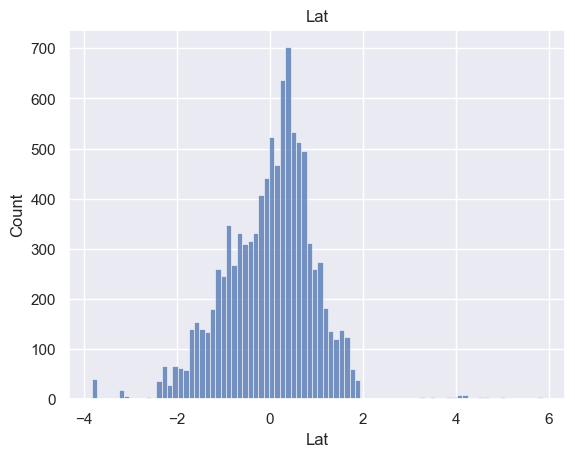

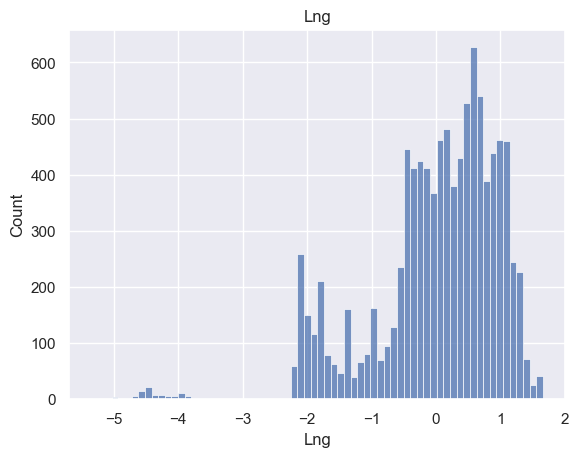

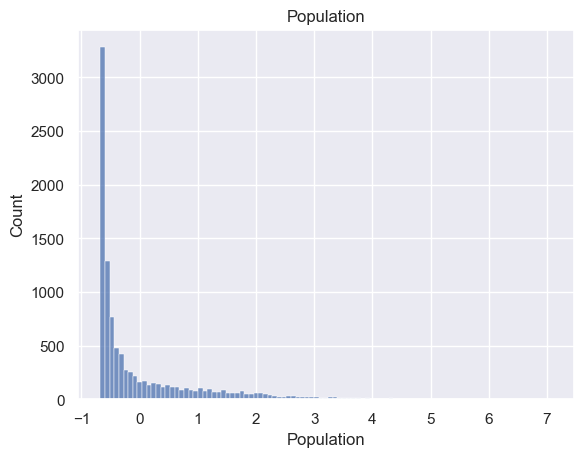

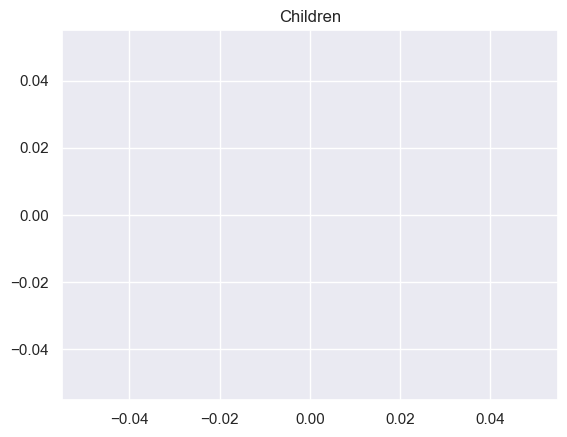

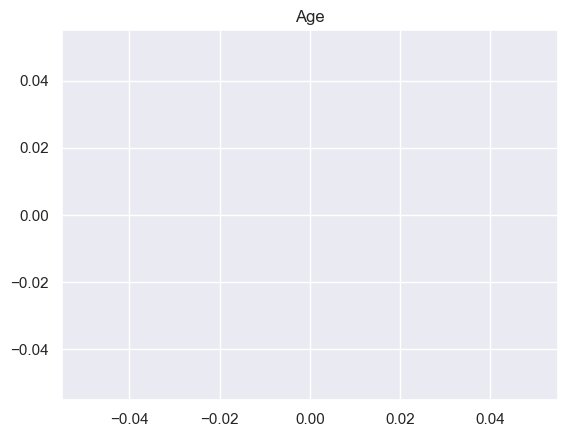

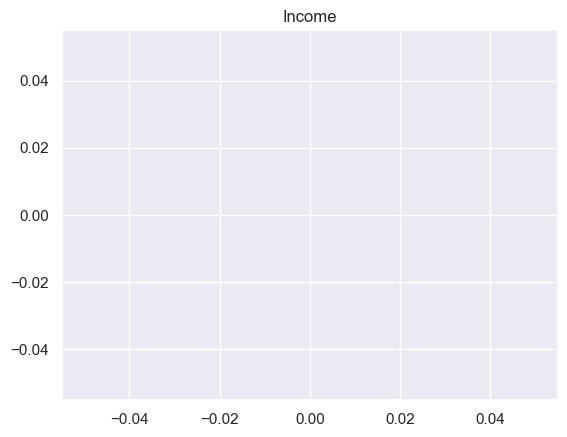

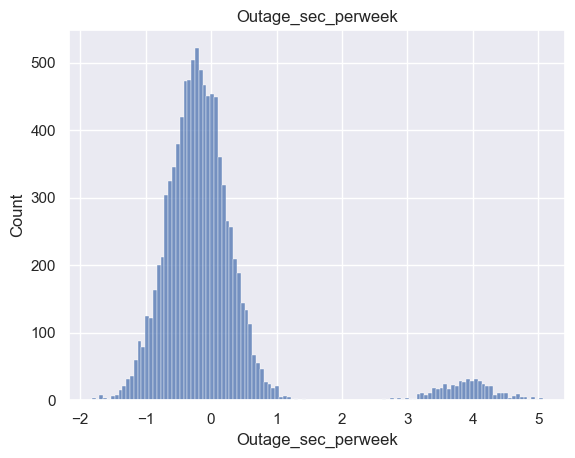

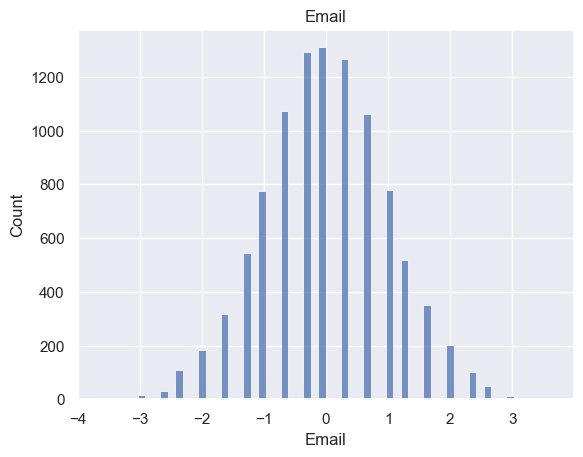

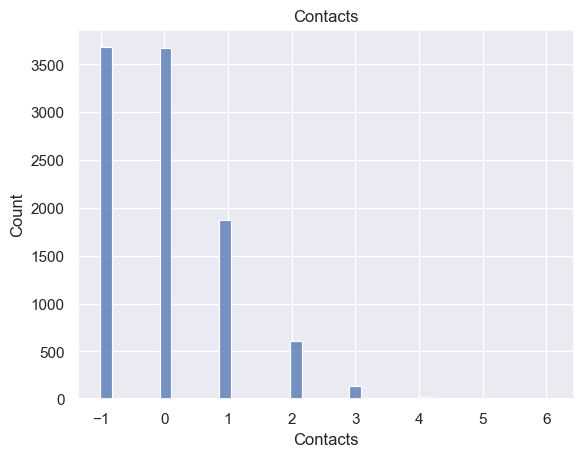

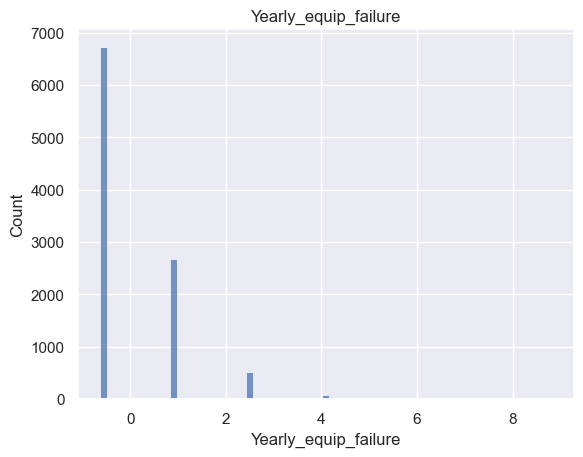

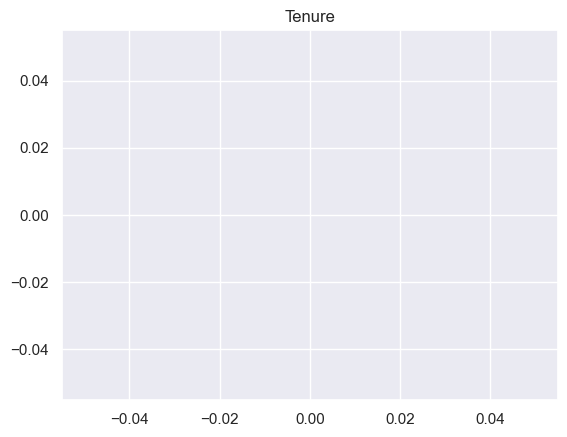

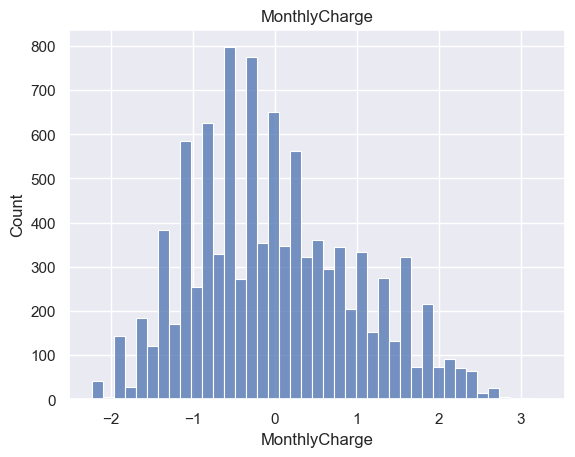

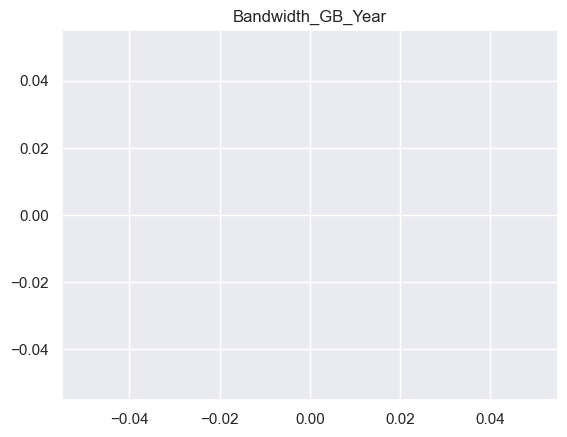

In [58]:
#Drop qualitative features from num_cols1
num_cols1 = [i for i in num_cols if i not in (
    ['CaseOrder','Zip', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8'])]

#Create a copy of our working dataframe to use for z-score storage.
demo_zscore_df = df.copy(deep=True)

#Get the z scores for values in numeric columns in demo_zscore_df.
for col in demo_zscore_df:
    if col in num_cols1:
        demo_zscore_df[col] = stats.zscore(df[col])

#Visualize the z scores of each of our numerical columns as a histogram individually for visual clarity.
if show_vis == 'y':
    for col in num_cols1:
        sns.histplot(data = demo_zscore_df, x = col)
        plt.title(col)
        plt.show()


As we can see from the histograms above, several features do not return any values when evaluated for z-scores. This is because these features contain missing values. Features containing NaN values can not be evaluated for z-scores using this method, which also underpins the importance of performing this step after imputation is performed for missingness.

In [59]:
print(len(num_cols1))

13


D1:CLEANING FINDINGS<br>
AND<br>
D2: JUSTIFICATION OF MITIGATION METHODS

After executing our assessment methods, we can describe our findings for each identified aspect of our data quality. With regards to exploring unique values across features, no features were identified with obvious data entry mistakes. We detected no duplicate rows, nor any duplicate values in the Customer_id and Interaction columns. 

After searching for negative numeric values, we determined that the Lng column contains 10,000 negative values (100% of the data), and Outage_sec_perweek contains 11 negative values. 10,000 negative longitude values simply indicates that the entire dataset lives in the western hemisphere, which is what we would expect of this feature. However, a direct measure of elapsed time such as Outage_sec_perweek should not be negative, so we should seek to mitigate the issue, if possible. Our sample size is 10,000, and our affected data is 11 rows. If we divide 11 by 10,000, we can see that the affected data represents 0.11% of the total dataset, or eleven hundredths of a single percent. With this in mind, we will drop the 11 affected rows with minimal impact on our overall sample size.

Our exploration of Population values of zero returns 97 instances in the data. This is an interesting facet of this data, because it means that nearly 1 percent of the dataset is affected. We could choose to drop the affected data, however, the data dictionary specifies that this measure is taken directly from census data, we can reasonably infer that the data may not be not a direct count, but rather a count divided by an area size, and that treating zero values differently than the rest could bias our data. We will instead choose to preserve the affected data as is and note the anomaly.

Moving to our examination of the Lat and Lng columns, we can see that the cities associated with these values do appear to match their latitudes and longitudes, so we can retain them.

Our evaluation of missingness demonstrated that several columns have a significant number of missing values. The affected columns, along with the sums of null values contained therein, are as follows:

Children: 2495
Age: 2475
Income: 2490
Techie: 2477
Phone: 1026
TechSupport: 991
Tenure: 931
Bandwidth_GB_Year: 1021

Each of these sums are far too great to consider dropping from our dataset altogether, as doing so might drastically skew our data in future analyses. As a result, we will elect to impute the missing values for these features. We will first utilize KNN imputation across our missing data, as it is a robust enough method to handle both quantitative and qualitative variables. However, because some of our missing data occurs in categorical features, we must also encode those features so that they can be processed numerically according to the KNN algorithm (Donthi, S., "Dealing with Missing Data in Python"). We will next have to make some decisions regarding how each fature should be encoded based on whether or not they can be logically weighted. Although there are only 3 categorical features with missing values, we need to encode every categorical feature in the dataset in order to use KNN imputing. If the categories or string values of a feature can not be logically weighted, we should plan to encode them nominally, using One-Hot encoding. If the values can be logically weighted, we would tend to favor ordinal encoding. However, there is another factor to consider in this matter. One-Hot encoding involves giving each unique value of a category its own new column. If the given row contains that value in the original categorical column, the related column after encoding is assigned a value of one, and all other encoded columns are given a value of zero. This prevents the data from being weighted, but it also drastically increases the size of our data set and the complexity of multivariate imputation. For this reason, we have elected to limit our nominally-encoded features to the following: <br>
['PaymentMethod', 'Gender', 'Marital', 'InternetService']

We will ordinally encode the following features:<br>
['Area', 'Timezone', 'Education', 'Employment', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Job', 'County', 'State', 'City', 'Interaction', 'Customer_id', 'Job', 'County', 'State', 'City', 'Interaction', 'Customer_id']

It is worth noting that the following features in our list of columns to be ordinally encoded should actually be nominally encoded, but the number of extra encoded columns they would introduce to our dataset would make it extremely complex. Even if we only encoded the State feature nominally, we would nearly double the number of columns in our total dataset. For that reason, the following features are being encoded ordinally.<br>
['Job','County', 'State', 'City', 'Interaction', 'Customer_id']

Once we have properly encoded our qualitative features and imputed all features containing missing values, we will visualize the new distributions and see if they appear similar to the distributions visualized on the incomplete data. If necessary, we may choose to apply different imputation methods to specific features to rectify any apparently inaccurate imputations yielded by the KNN method.

Our findings for the assessment of outliers are incomplete. The Children, Age, Income, Tenure, and Bandwidth_GB_Year features all contain missing values and cannot have their z-scores calculated at this time. We will re-assess them after the imputation process is complete. However, or visualizations do indicate that the Lat, Lng, Population, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, and MonthlyCharge columns all contain values with z-scores greater than three. The features appear to have varying amounts and degrees of outliers, so we will need to look at them more closely to decide how to proceed. We will do that using the following code:

In [60]:
outlier_cols1 = ['Lat', 'Lng', 'Outage_sec_perweek','Population','Email','Contacts','Yearly_equip_failure','MonthlyCharge']
outlier_total = 0
for col in outlier_cols1:
    out_sum = (np.logical_or(demo_zscore_df[col]>3,  demo_zscore_df[col]<-3)).sum()
    print(col + ' total outliers = ' + str(out_sum))
    outlier_total += out_sum

print('Total outliers = ' + str(outlier_total))

Lat total outliers = 151
Lng total outliers = 102
Outage_sec_perweek total outliers = 491
Population total outliers = 219
Email total outliers = 12
Contacts total outliers = 165
Yearly_equip_failure total outliers = 94
MonthlyCharge total outliers = 3
Total outliers = 1237


The Outage_sec_perweek feature has 491 outliers. That represents nearly 5% of our total dataset. Changing these values could distort an analysis that uses this feature, so we will also choose to preserve the outliers of this features

Excluding those features that still need to be assessed later, the remaining features containing outliers bring us to another choice. As we observe, the outlier sums of those features range from 3 to 219, and our total number of outliers is 875. We can see that of the 9 columns containing outliers, two columns (Email and MonthlyCharge) contain only 12 and 3 outliers, respectively. On the other hand, the remaining columns contain from 94 to 491 outliers. These features have enough outliers to consider that they may be important to preserve as pieces of the distribution, or in the case of latitude and longitude, we may impair our ability to analyze data from regions at geographical extremes, such as Alaska and Puerto Rico. It will be best to retain all outliers separately so that analysis can be performed on a dataset with outliers median imputed while also keeping the ability to include them for the purpose of comparing results. So we will store and export these outliers in a separate dataframe, and use median imputation to replace them in our cleaned dataset.

The remaining 5 features to be evaluated will be re-assessed in a loop with the above features included at the appropriate time in the cleaning process before deciding how best to handle any outliers found therein.

D3: SUMMARY OF THE OUTCOMES<br>
AND<br>
D4: MITIGATION CODE

For clarity and continuity, and due to the importance of executing specific data cleaning steps in sequence, we will summarize the outcomes of our mitigation strategies as we implement them throughout the code itself. This will enable us to justify our ongoing decision making processes relevant to our choice of data handling strategies.

In addition, we will be using Jupyter's built-in export functionality to generate a .py file called 'script.py' containing all content of this notebook, which will be submitted without any edits alongside this .ipynb file. 

Our first mitigation task is to handle duplicates in the dataset. Conveniently, our assessment returned no duplicate rows. However, we can still execute mitigation procedures using the following code:

In [61]:
#Drop any duplicate rows from the dataframe
df.drop_duplicates(inplace=True)

To check our results and see if further steps are required, we will make an assert statement that generates a pandas series with boolean values reflecting whether the corresponding Customer_id or Interaction in the original dataframe is a duplicate, since these values are intended to be unique. A pandas series with no duplicates should return a series where every value is a False boolean value, so that will be the basis of our assertions.

In [62]:
#Check for duplicates using assertion statements.
assert df['Customer_id'].duplicated().all() == False
assert df['Interaction'].duplicated().all() == False

The assertion did not raise any exceptions, so we can move on to dropping the rows containing our negative numeric values in the Outage_sec_perweek column.

In [63]:
#Drop each row of the dataframe where the value of the 'Outage_sec_perweek' column is less than 0.
df.drop(df[df['Outage_sec_perweek'] < 0].index, inplace=True)

Now we can run a loop to confirm the success of the operation. The number returned for the Lng column should now be 9989 after subtracting 11 from 10,000, and the number returned for Outage_sec_perweek should be 0. We will also use the .info function on the dataframe to ensure all columns are 9989 rows long.

In [64]:
#Run our loop once again to return negative numeric values for each column.
for col in num_cols:
    neg_sum = (df[col] < 0).sum()
    print(col, 'negative values =', neg_sum)

#Check the info of our dataframe to make sure all columns are now 9989 rows long.
print(df.info())

CaseOrder negative values = 0
Zip negative values = 0
Lat negative values = 0
Lng negative values = 9989
Population negative values = 0
Children negative values = 0
Age negative values = 0
Income negative values = 0
Outage_sec_perweek negative values = 0
Email negative values = 0
Contacts negative values = 0
Yearly_equip_failure negative values = 0
Tenure negative values = 0
MonthlyCharge negative values = 0
Bandwidth_GB_Year negative values = 0
item1 negative values = 0
item2 negative values = 0
item3 negative values = 0
item4 negative values = 0
item5 negative values = 0
item6 negative values = 0
item7 negative values = 0
item8 negative values = 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9989 non-null   int64  
 1   CaseOrder             9989 non-null   int64  
 2   Customer_id           9989

Since we decided to preserve our 97 values of zero in the Population column, we do not have to perform any operations on this data. We have also decided to move forward with our Lat and Lng columns as is after determining that the extremes appear consistent with their associated regional data.

As we observed when assessing our data quality, there are multiple features in this dataset with large amounts of missing values. These columns are Children, Age, Income, Techie, Phone, TechSupport, Tenure, and Bandwidth_GB_Year. We will first attempt to impute them using K-Nearest Neighbor imputation, which is a multivariate algorithmic imputation method.

However, since we need to restructure some of our data for the purposes of encoding and future data cleaning steps, we will need to clean up our num_cols list at this point. We can safely drop the Zip and itemX columns from our num_cols list now, as they have now been searched for nullity and data entry mistakes, and as mentioned previously, are actually qualitative data despite their numeric data types. We will also drop the CaseOrder column from this list, because the data dictionary states that it is merely a placeholder value to preserve the original data order.

In [65]:
num_cols = [i for i in num_cols if i not in (
    ['CaseOrder','Zip', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8'])]

This is also a good time to gather our missing columns into their own list so that we can interact with them easily in loops. We will also make a list of the numeric columns with missing data so that we can manipulate qualitative and quantitative features containing missingness differently.

In [66]:
#Make a list out of the names of the columns that have missing data.
missing_cols = df.columns[df.isnull().any()].to_list()

#Make a list of the numeric columns that have missing data.
missing_num_cols = []
for col in missing_cols:
    if col in num_cols:
        missing_num_cols.append(col)
      
print('Missing columns:')  
print(missing_cols)
print('Missing numerical columns:')  
print(missing_num_cols)

Missing columns:
['Children', 'Age', 'Income', 'Techie', 'Phone', 'TechSupport', 'Tenure', 'Bandwidth_GB_Year']
Missing numerical columns:
['Children', 'Age', 'Income', 'Tenure', 'Bandwidth_GB_Year']


Now we will make a copy of our current working dataframe so we can compare the statistical measures of our imputations with the partially-cleaned data we have now.

In [67]:
#Make a copy of the dataframe
dfx = df.copy(deep=True)

Next we will examine the distributions of each numerical feature by plotting them in their own histograms and displaying those histograms on a grid using the Seaborn library. It is important to perform this step now so that we can compare our distributions before and after imputation. Because we made a list of the columns with missing data, we can do this in a loop. As we will be repeating this code later, we can also wrap it in a function.

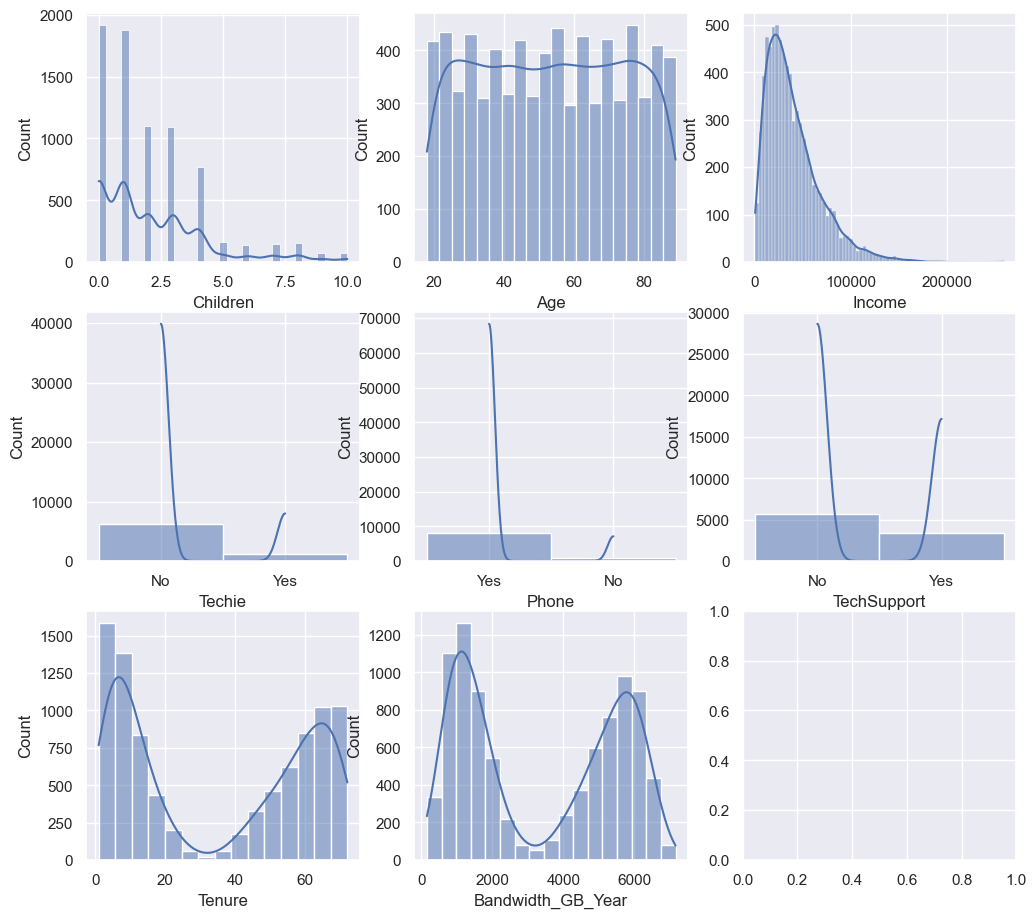

In [68]:
#Create a function to visualize the distribution of missing data in each column
def vis_grid(df=df, grid_col=3, cols=df_cols):
    grid_row = int(np.ceil(len(cols)/grid_col))
    sns.set_theme(style="darkgrid")
    fig, axs = plt.subplots(grid_col, grid_row, figsize=(12,11))
    sbx=0
    sby=0
    for col in cols:
        sns.histplot(data = df, x = col, kde=True, ax=axs[sby, sbx]) 
        if sbx < grid_row-1: sbx+=1
        else:
            sby+=1
            sbx=0
    plt.show()

#Now call the function to do our visualization
if show_vis == 'y':
    vis_grid(cols=missing_cols)

Our visualization shows a range of distribution types. The distribution of the Income feature could be described as normal, even though it appears clipped because it cannot go lower than zero. The Children feature could be described as displaying a positive skew. The Tenure and Bandwidth_GB_Year columns both display a bimodal distribution. The Age feature seems to indicate a uniform distribution. The Techie, Phone, and TechSupport features are effectively boolean, meaning we can not accurately describe a distribution for these features. However, we can observe the general balance of values through the shape of the histogram, which will be useful in evaluating the efficacy of our imputation methods. We will first encode our categorical features so that we can utilize KNN imputation. To do that, we need to specify which features will be encoded ordinally, and which will be encoded nominally. We only have to define one list explicitly; the other can be inferred and generated using boolean filtering.

In [69]:
#Generate our lists of categorical features to be encoded using each method.
nom_enc_cols= ['PaymentMethod','Gender','Marital','Job','County','State','City','Interaction','Customer_id', 'InternetService']
ord_enc_cols= []
for col in cat_cols:
    if col not in nom_enc_cols:
        ord_enc_cols.append(col)

As discussed previously, some features that would be appropriately encoded using the One-Hot method (nominal categorical features), will generate far too many additional columns relative to the size of our dataset and multiply our model complexity. We will instead encode those features ordinally and prepare to do that using the following code:

In [70]:
#Moving the columns from nominal to ordinal encoding
nom_enc_cols = [i for i in nom_enc_cols if i not in (['Job','County', 'State', 'City', 'Interaction', 'Customer_id'])]
ord_enc_cols.extend(['Job','County', 'State', 'City', 'Interaction', 'Customer_id'])
#This leaves us with 4 nominal values to encode with One-Hot encoding.
print(nom_enc_cols)
print(ord_enc_cols)

['PaymentMethod', 'Gender', 'Marital', 'InternetService']
['Area', 'Timezone', 'Education', 'Employment', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Job', 'County', 'State', 'City', 'Interaction', 'Customer_id']


Now we can begin to encode. First we will encode our nominal categorical variables using One-Hot encoding. We will also make a new working copy of our dataframe, as well as a dataframe designed to encode and temporarily store our encoded data. These will ultimately be reintegrated with the rest of the data at the end of the script, just before we export our cleaned dataset.

In [71]:
#We are nearly ready to start encoding.
#Make a blank disctionary to be used in the encoding and imputation process.
nom_enc_dict = {}

#We will also make a new working copy of our dataframe for ease of manipulation during the imputation process. 
KNN_df = df.copy(deep=True)

#Create a blank dataframe specifically for the nominal encoding process
nom_df = pd.DataFrame()

In [72]:
#Use a loop to encode each of our nominal columns using ONE-HOT encoding.
for col_name in nom_enc_cols:
    nom_enc_dict[col_name] = OneHotEncoder()
    col = KNN_df[col_name]
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    nom_vals = nom_enc_dict[col_name].fit_transform(reshaped_vals)
    nom_df_loop = pd.DataFrame(nom_vals.toarray(), columns=nom_enc_dict[col_name].get_feature_names_out())
    nom_df_loop.index = col_not_null.index
    nom_df = nom_df.join(nom_df_loop, how='outer')

print(nom_df.columns.tolist())

['x0_Bank Transfer(automatic)', 'x0_Credit Card (automatic)', 'x0_Electronic Check', 'x0_Mailed Check', 'x0_Female', 'x0_Male', 'x0_Prefer not to answer', 'x0_Divorced', 'x0_Married', 'x0_Never Married', 'x0_Separated', 'x0_Widowed', 'x0_DSL', 'x0_Fiber Optic', 'x0_None']


We will now improve the clarity of what these columns are and what features they are derived from using some string manipulation techniques.

In [73]:
#Search all column names in nom_df and if they start with 'x0_', remove 'x0_' from the string and add _Num to the end. 
for col in nom_df.columns:
    if col.startswith('x0_'):
        new_col_name = col.replace('x0_', '')
        nom_df.rename(columns={col: new_col_name}, inplace=True)
        
print(nom_df.columns.tolist())

['Bank Transfer(automatic)', 'Credit Card (automatic)', 'Electronic Check', 'Mailed Check', 'Female', 'Male', 'Prefer not to answer', 'Divorced', 'Married', 'Never Married', 'Separated', 'Widowed', 'DSL', 'Fiber Optic', 'None']


Now we can move on to ordinal encoding. For simplicity, we will encode all the categorical columns of the dataframe in this loop to a new dataframe. Then we will replace the columns that were encoded nominally with their appropriate One-Hot encoded columns from nom_df so that we can impute on our combined dataframe.

In [74]:
#As before, we will make a blank dictionary and a copy of our working dataframe.
ord_enc_dict = {}
ord_df = KNN_df.copy(deep=True)

for col_name in KNN_df:
    ord_enc_dict[col_name] = OrdinalEncoder()
    col = KNN_df[col_name]
    col_not_null = col[col.notnull()]
    ord_vals = col_not_null.values.reshape(-1, 1)
    ord_vals = ord_enc_dict[col_name].fit_transform(ord_vals)
    ord_df.loc[col.notnull(), col_name] = np.squeeze(ord_vals)
print(ord_df.columns.tolist())

['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8']


At this point we should also check our ordinally encoded features to check for any apparent issues or inconsistencies.

In [75]:
#Compare the headers of the original categorical columns to the encoded columns.
for col in cat_cols:
    if col not in nom_enc_cols:
        print('---')
        print('Before:')
        print(df[col].head())
        print('After:')
        print(ord_df[col].head())
print('---')

---
Before:
0    K409198
1    S120509
2    K191035
3     D90850
4    K662701
Name: Customer_id, dtype: object
After:
0    3915.0
1    6830.0
2    3828.0
3    1478.0
4    4027.0
Name: Customer_id, dtype: float64
---
Before:
0    aa90260b-4141-4a24-8e36-b04ce1f4f77b
1    fb76459f-c047-4a9d-8af9-e0f7d4ac2524
2    344d114c-3736-4be5-98f7-c72c281e2d35
3    abfa2b40-2d43-4994-b15a-989b8c79e311
4    68a861fd-0d20-4e51-a587-8a90407ee574
Name: Interaction, dtype: object
After:
0    6630.0
1    9817.0
2    2026.0
3    6684.0
4    4110.0
Name: Interaction, dtype: float64
---
Before:
0    Point Baker
1    West Branch
2        Yamhill
3        Del Mar
4      Needville
Name: City, dtype: object
After:
0    4322.0
1    5777.0
2    6018.0
3    1347.0
4    3695.0
Name: City, dtype: float64
---
Before:
0    AK
1    MI
2    OR
3    CA
4    TX
Name: State, dtype: object
After:
0     0.0
1    22.0
2    37.0
3     4.0
4    44.0
Name: State, dtype: float64
---
Before:
0    Prince of Wales-Hyder
1            

It looks like our ordinal Yes/No columns encoded correctly, as well as our Area and Contract columns. One common factor between these columns is that they all appear to be encoded alphabetically, with their assigned integers starting from 0. This method has ordered them correctly by default. Unfortunately, this method has also ordered several features incorrectly based on our understanding of their weights. 

There appear to be three columns affected by this issue: Education, InternetService, and Employment. We will need to encode these features manually based on our expectations of their ordering. Using the unique values for these columns, we can use a quick map function to assign each category their own ranking from least to most education. We will do this in our working data and copy it to our working KNN dataframe to simplify imputing and merging the data later.

In [76]:
#First we return the unique values for the Education column:
print(ord_df['Education'].unique())

[ 5.  9.  3.  6.  1.  2. 11.  4. 10.  0.  7.  8.]


In [77]:
#Then rank and map them
ord_df['Education'] = df['Education'].map({
    'No Schooling Completed': 0,
    'Nursery School to 8th Grade': 1,
    '9th Grade to 12th Grade, No Diploma': 2,
    'GED or Alternative Credential': 3,
    'Regular High School Diploma': 4,
    'Some College, Less than 1 Year': 5,
    'Some College, 1 or More Years, No Degree': 6,
    "Associate's Degree": 7,
    "Bachelor's Degree": 8,
    "Master's Degree": 9,
    'Professional School Degree': 10,
    'Doctorate Degree': 11,
     })

#Return the unique values again to verify that their occurring order has been changed.
print(ord_df['Education'].unique())

[ 9  4 11  0  7  8  5  3  6  2  1 10]


In [78]:
#Now we can do the same for InternetService and Employment
ord_df['InternetService'] = df['InternetService'].map({
    'None': 0,
    'DSL': 1,
    'Fiber Optic': 2
     })

ord_df['Employment'] = df['Employment'].map({
    'Unemployed' : 0,
    'Student' : 1,
    'Part Time' : 2,
    'Full Time': 3,
    'Retired': 4
    })

#And verify that the process was successful.
print(ord_df['InternetService'].unique())
print('---')
print(ord_df['Employment'].unique())

[2 1 0]
---
[2 4 1 3 0]


Now we will join our encoded dataframes together for imputation. We will check this process by examining the column names in the new dataframe. If we have organized our data correctly, we should see the nominally encoded columns appear in this dataframe and not see their source columns.

In [79]:
#Drop the source columns of our ONE HOT encoded data
for col in nom_enc_cols:
    ord_df.drop(columns=col, inplace=True)

#Add all of the component columns from nom_df
for col in nom_df:
    ord_df[col] = nom_df[col]

print(ord_df.columns.tolist())

['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment', 'Income', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8', 'Bank Transfer(automatic)', 'Credit Card (automatic)', 'Electronic Check', 'Mailed Check', 'Female', 'Male', 'Prefer not to answer', 'Divorced', 'Married', 'Never Married', 'Separated', 'Widowed', 'DSL', 'Fiber Optic', 'None']


Our columns appear to be correct, so we can move on by copying everything to our working dataframe. We will then be prepared to impute using KNN.

In [80]:
#Copy our encoded detaframe to our KNN_df
KNN_df = ord_df.copy(deep=True)
#Impute the data. (This may take a moment.)
KNN_imputer = KNN()
KNN_df.iloc[:,:] = np.round(KNN_imputer.fit_transform(KNN_df))

Imputing row 1/9989 with 1 missing, elapsed time: 50.661
Imputing row 101/9989 with 2 missing, elapsed time: 50.682
Imputing row 201/9989 with 1 missing, elapsed time: 50.701
Imputing row 301/9989 with 2 missing, elapsed time: 50.736
Imputing row 401/9989 with 1 missing, elapsed time: 50.752
Imputing row 501/9989 with 1 missing, elapsed time: 50.789
Imputing row 601/9989 with 1 missing, elapsed time: 50.802
Imputing row 701/9989 with 0 missing, elapsed time: 50.813
Imputing row 801/9989 with 0 missing, elapsed time: 50.827
Imputing row 901/9989 with 0 missing, elapsed time: 50.855
Imputing row 1001/9989 with 0 missing, elapsed time: 50.867
Imputing row 1101/9989 with 0 missing, elapsed time: 50.883
Imputing row 1201/9989 with 3 missing, elapsed time: 50.897
Imputing row 1301/9989 with 1 missing, elapsed time: 50.925
Imputing row 1401/9989 with 3 missing, elapsed time: 50.938
Imputing row 1501/9989 with 2 missing, elapsed time: 50.952
Imputing row 1601/9989 with 1 missing, elapsed time:

We will also make a copy of our dataframe after imputation. This will ultimately make it simpler to organize and export our data at the conclusion of the cleaning process.

In [81]:
Num_df = KNN_df.copy(deep=True)

Now we can reverse the encoding process in KNN_df while retaining our imputed values in place and visualize the missing columns using the function we wrote earlier. This will make it very simple to compare the distribution shapes after imputation.

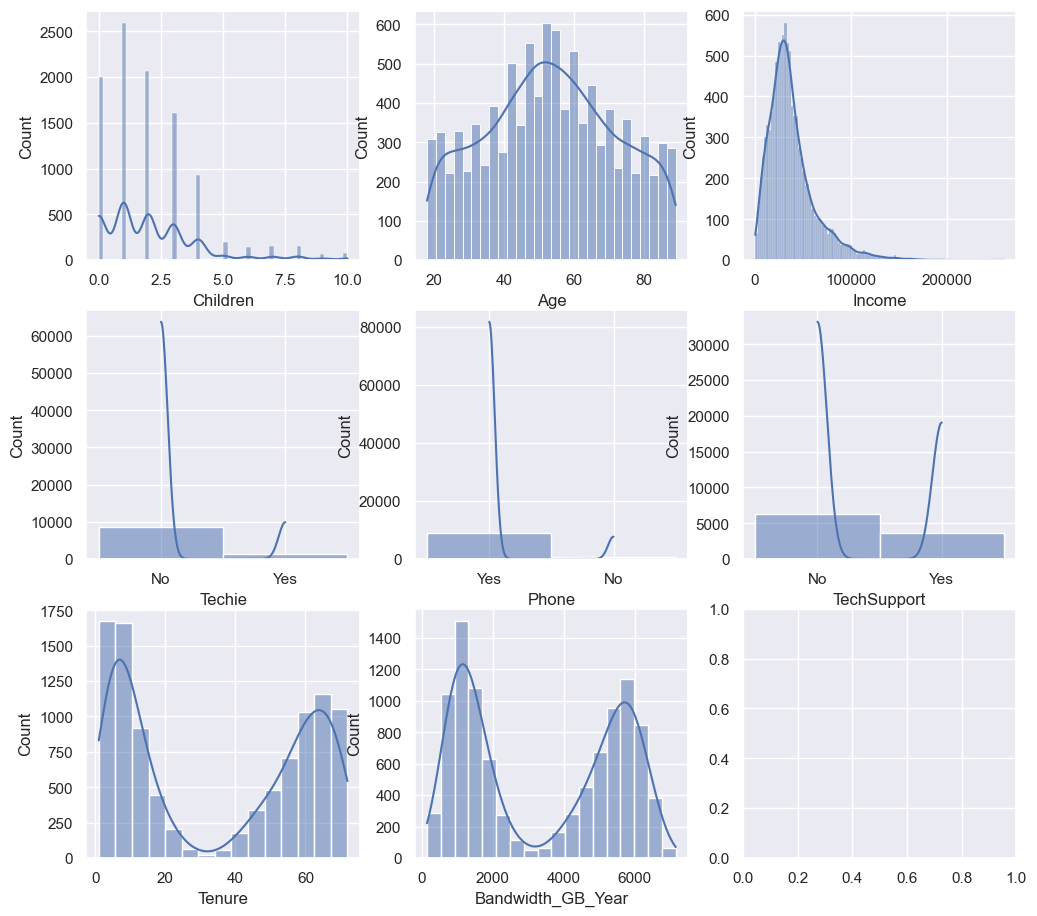

In [82]:
#Use our encoding dictionaries to inverse transform the encoded columns.
for col in KNN_df:
    if col in ord_enc_dict.keys():
        reshaped_col = KNN_df[col].values.reshape(-1,1)
        KNN_df[col] = ord_enc_dict[col].inverse_transform(reshaped_col)
    elif col in nom_enc_dict.keys():
        reshaped_col = KNN_df[col].values.reshape(-1,1)
        KNN_df[col] = nom_enc_dict[col].inverse_transform(reshaped_col)
    else: pass
#Visualize the columns with missingness after KNN imputation.
if show_vis == 'y':
    vis_grid(df=KNN_df, cols=missing_cols)

#Code paraphrased from Donthi, R. Dealing with Missing Data in Python. DataCamp.
#https://app.datacamp.com/learn/courses/dealing-with-missing-data-in-python

The results appear to resemble the original distributions, with a few exceptions. It looks like using KNN imputation has turned the uniform distribution of our Age column into something that more closely resembles a normal distribution, and skewed our Children column significantly. For these reasons, we will consider alternative methods for handling missingness in these features. Mean, median, and mode univariate imputation with this degree of missingness might be inappropriate because these methods could create a spike in a single value and distort our dataset.

Instead, we will briefly experiment with some simple interpolation methods and see which one appears to be most appropriate for each feature. Because these interpolations will be performed on natively numerical data features and are not multivariate, we can simply take them from our original working dataframe (df), since those features have already been examined and are only waiting for imputation of missingness. Once we have decided on an imputation method and implemented it on these columns, we will then copy them back to our KNN_df so that we can perform PCA using that dataframe. To do this, we can isolate the columns to be imputed and then test different imputation methods within their own separate dataframes. Last, we will visualize each imputation method for both variables and decide which to move forward into the next phase of cleaning.

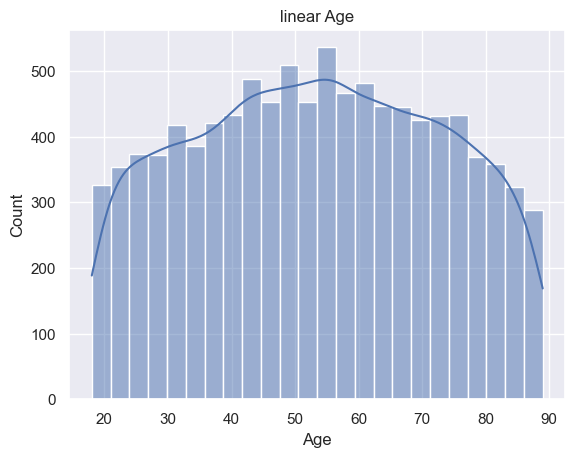

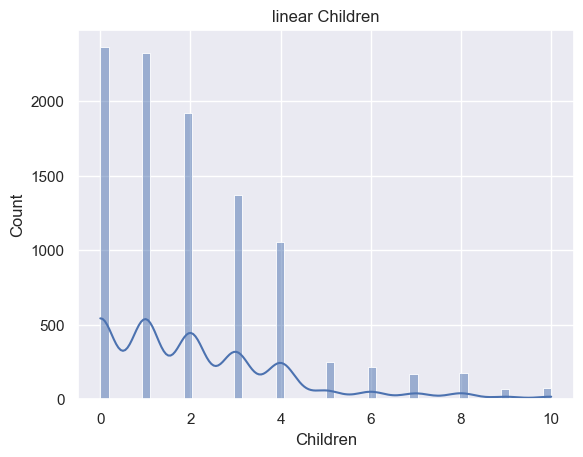

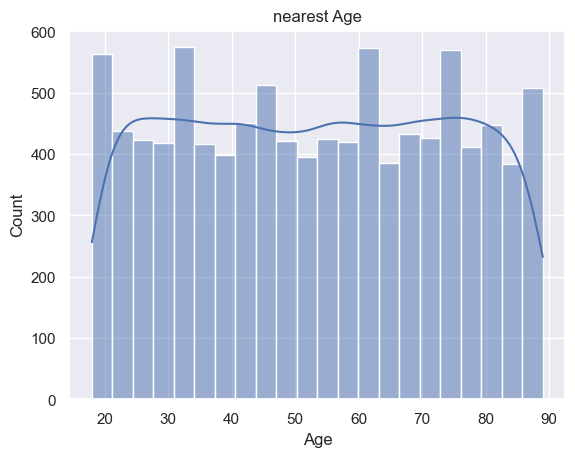

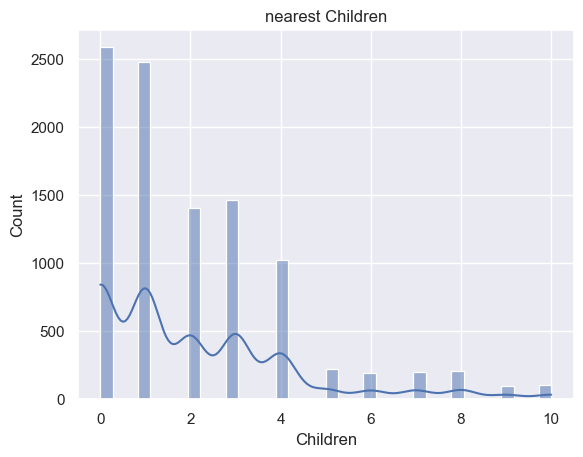

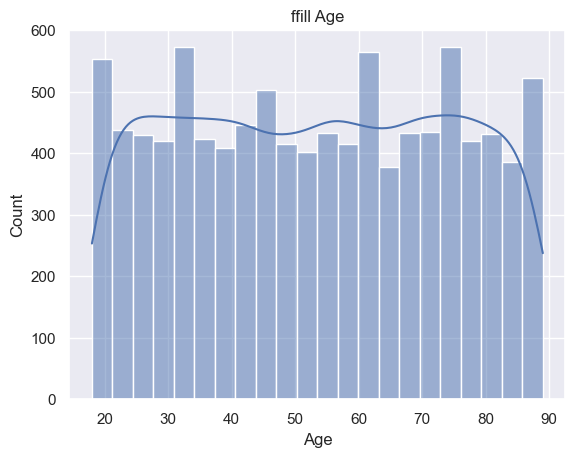

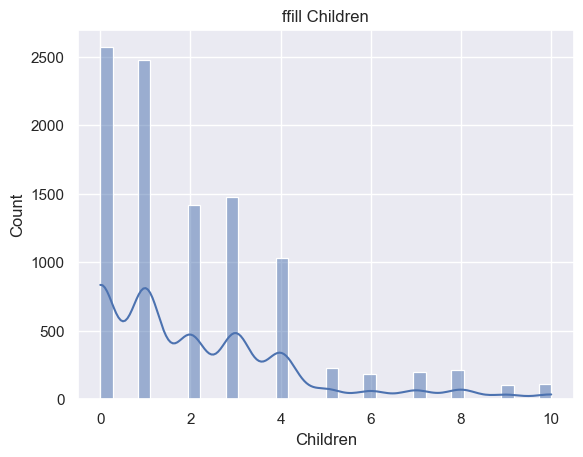

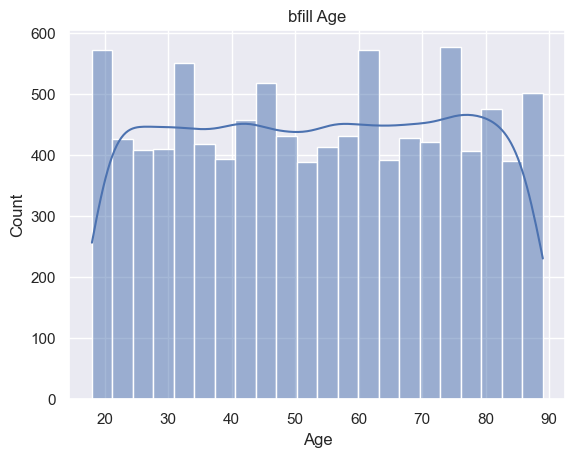

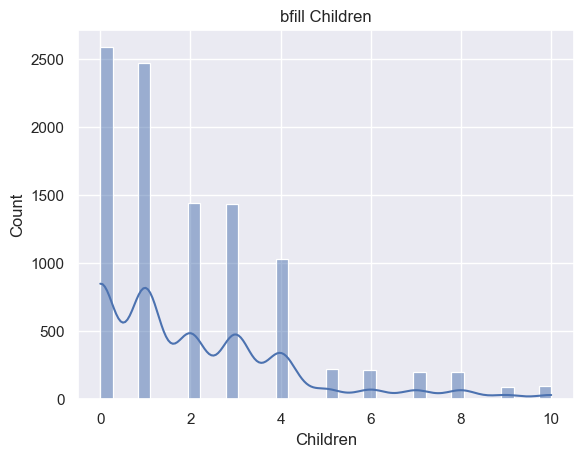

In [83]:
#Create a dataframe copy of the columns we want to experiment with and a blank list to visualize each method using a loop.
exp_df = df[['Age', 'Children']]
exp_dflist = []

#Create further copies of exp_df with imputations for comparison.
linear_df = exp_df.interpolate(method='linear')
#Here we must also round the values so we are not visualizing floats inappropriately.
linear_df = linear_df.round()
exp_dflist.append((linear_df, 'linear'))
nearest_df = exp_df.interpolate(method='nearest')
exp_dflist.append((nearest_df, 'nearest'))
ffill_df= exp_df.fillna(method='ffill')
exp_dflist.append((ffill_df, 'ffill'))
bfill_df = exp_df.fillna(method='bfill')
exp_dflist.append((bfill_df, 'bfill'))

#Visualize the results individually for each method.
for dfvar in exp_dflist:
    sns.histplot(data = dfvar[0], x = dfvar[0]["Age"], kde=True)
    plt.title(dfvar[1] + ' Age')
    plt.show()
    sns.histplot(data = dfvar[0], x = dfvar[0]["Children"], kde=True)
    plt.title(dfvar[1] +  ' Children')
    plt.show()



Examining the Age feature, it looks like linear interpolation will skew our Age data toward a normal distribution in the same way as KNN, but using the nearest, ffill, or bfill interpolations will retain a uniform distribution shape. Just in case there are any missing values at the very beginning or end of the data, we will move forward with using nearest interpolation for the Age feature. 

The Children feature presents us with an interesting choice of two options. Using nearest interpolation gives us a skew shape that very closely resembles that of the incomplete data, but given the fact that a quarter of the total data is missing, retaining the precise details of the distribution may also equate to retaining its inaccuracy. Linear interpolation, on the other hand, smooths out our skew, which we might expect to see in a more complete dataset. However, this column does also contain a missing value at the very beginning, which would remain after linear interpolation as a consequence of its need for a value both before and after the incidence of missingness. Considering all of this, we will choose to closely preserve the shape of the existing data and move forward with nearest imputation for the Children feature as well. At this time we can import the last two interpolated columns into our KNN dataframe.

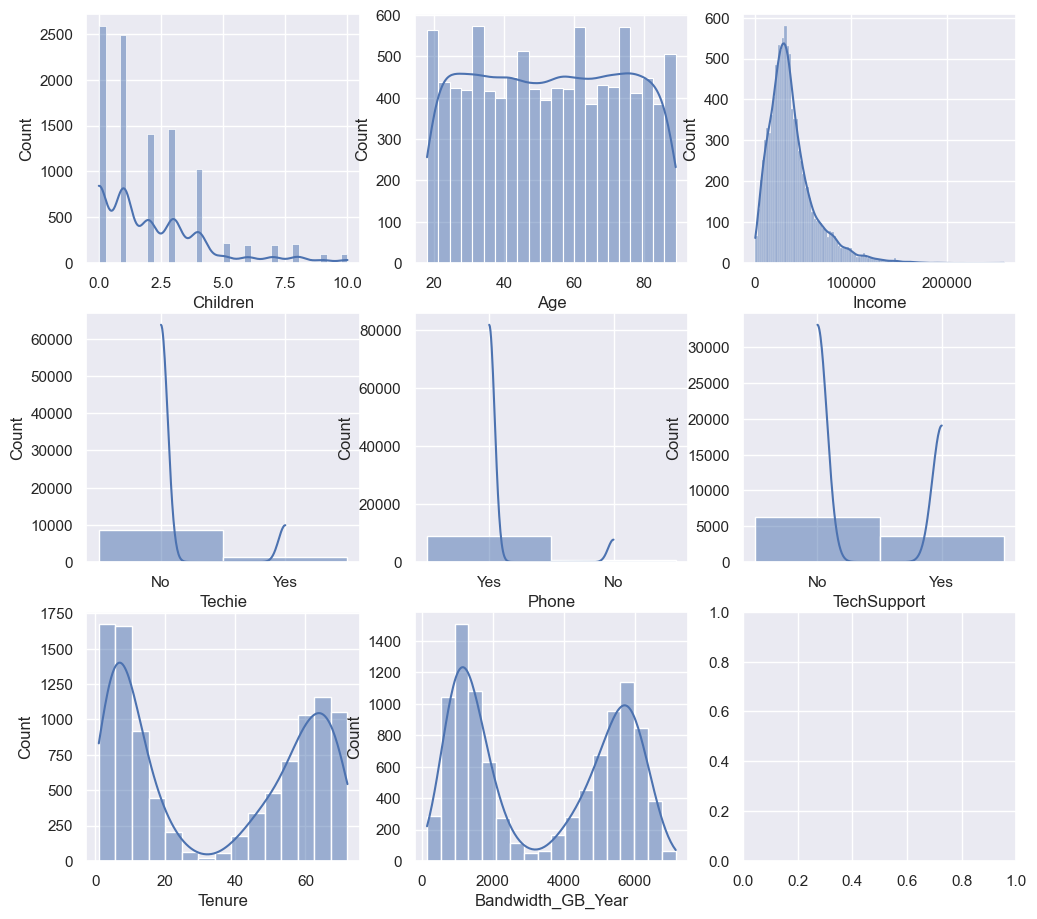

In [84]:
#Import the 2 columns
KNN_df['Age'] = nearest_df['Age']
KNN_df['Children'] = nearest_df['Children'].bfill()
#Visualize the results.
if show_vis == 'y':
    vis_grid(df=KNN_df, cols=missing_cols)

Our distributions now appear to be consistent with our previous visualizations of the data before imputation, but before we move onto outlier detection, we should check for nullity again in KNN_df to ensure our operations were successful.

In [85]:
#Check each column for nullity
print(KNN_df.isnull().sum())
#Make an assertion that there is no nullity in any column.
assert KNN_df.isnull().sum().sum() == 0

Unnamed: 0     0
CaseOrder      0
Customer_id    0
Interaction    0
City           0
              ..
Separated      0
Widowed        0
DSL            0
Fiber Optic    0
None           0
Length: 63, dtype: int64


At this point we can accurately assess our quantitative components for outliers, as we have imputed or interpolated all columns with missing values. We will accomplish this programmatically by assigning each value a z-score in an isolated dataframe, and then visualizing the distributions of the z-score to decide how to mitigate the effects of these outliers.

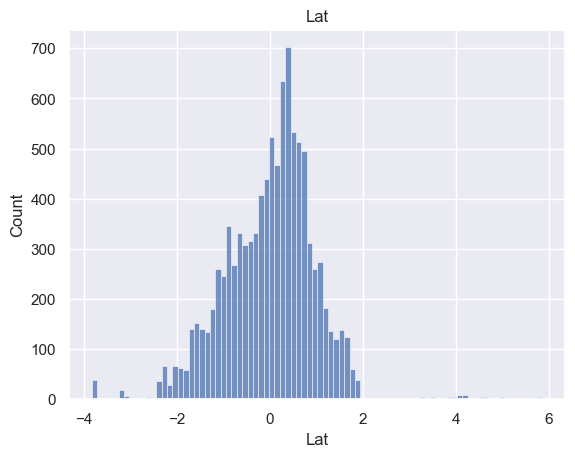

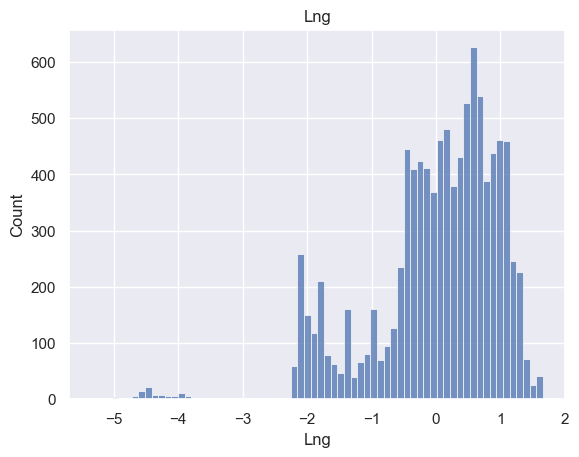

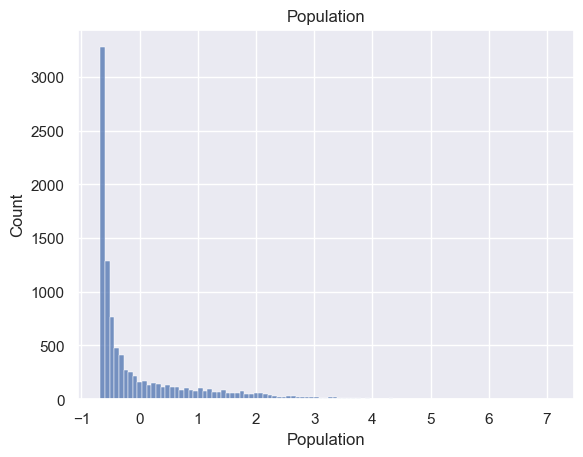

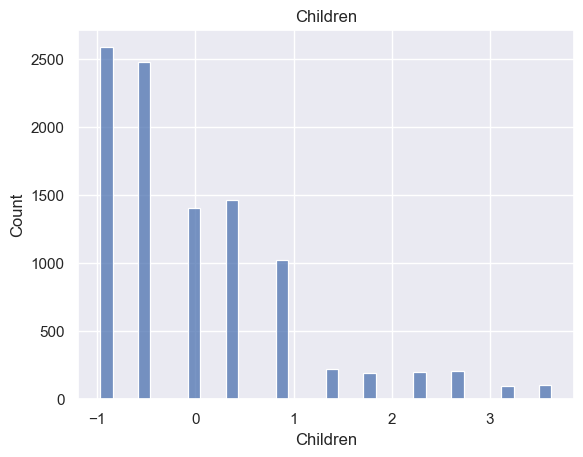

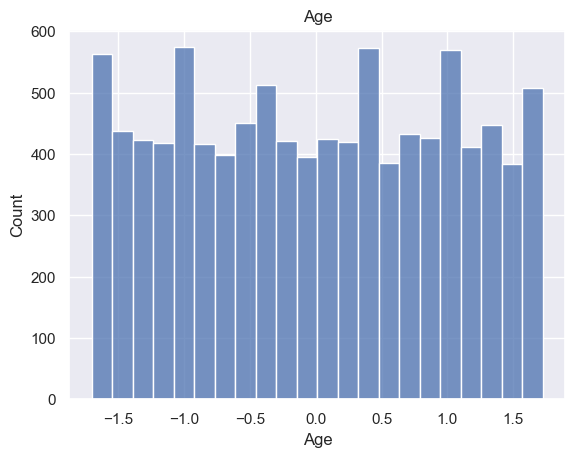

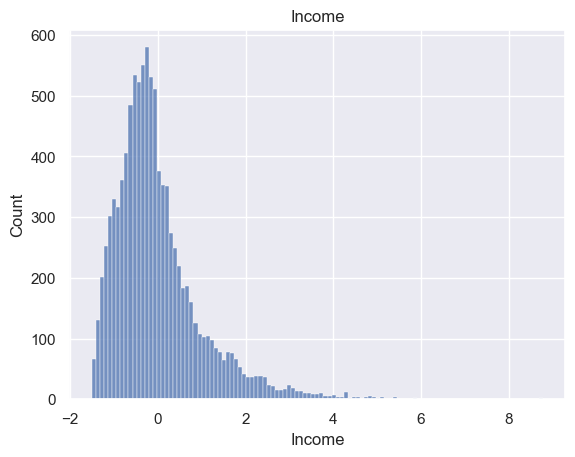

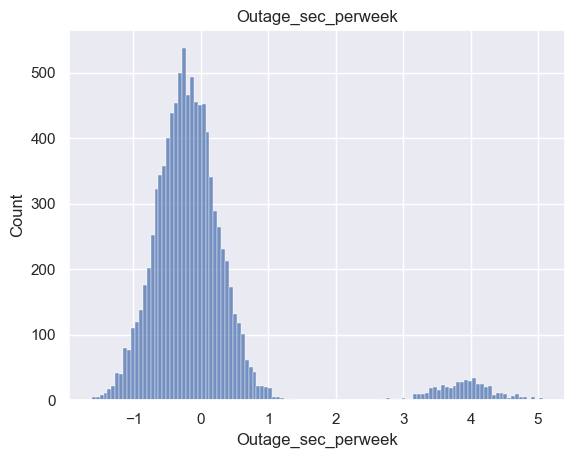

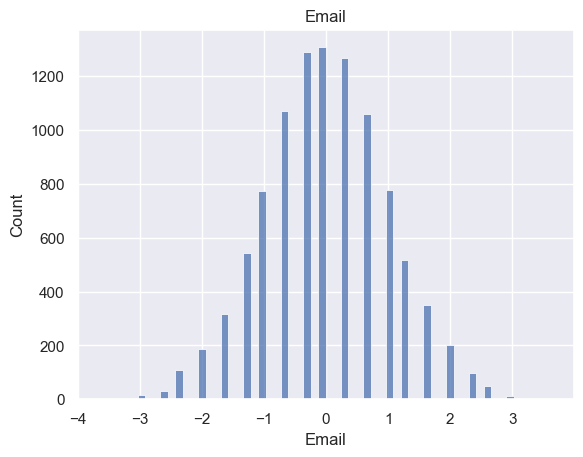

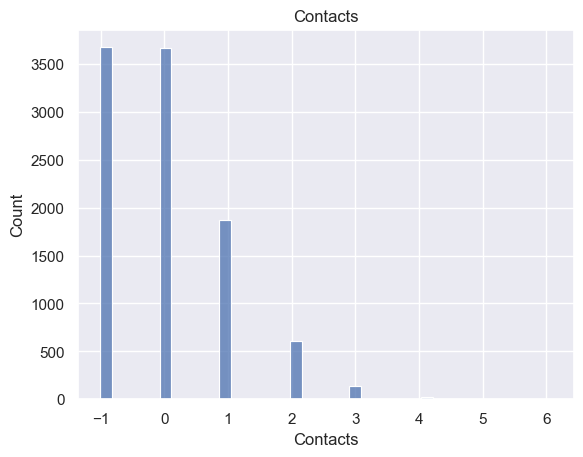

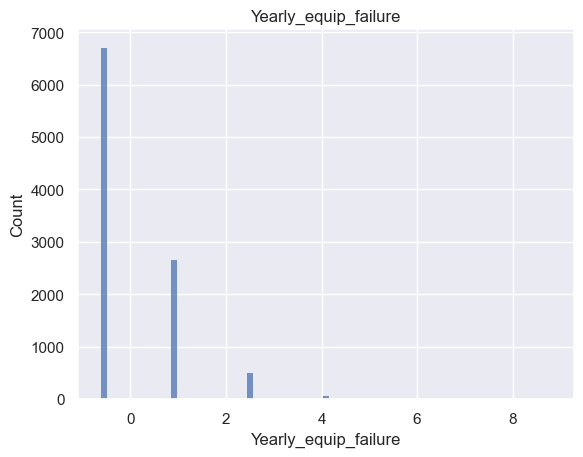

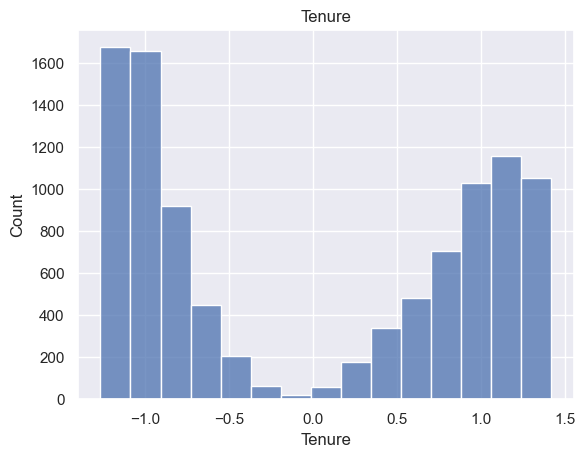

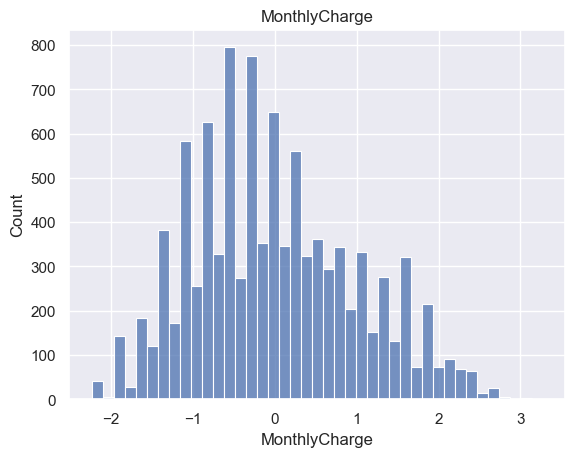

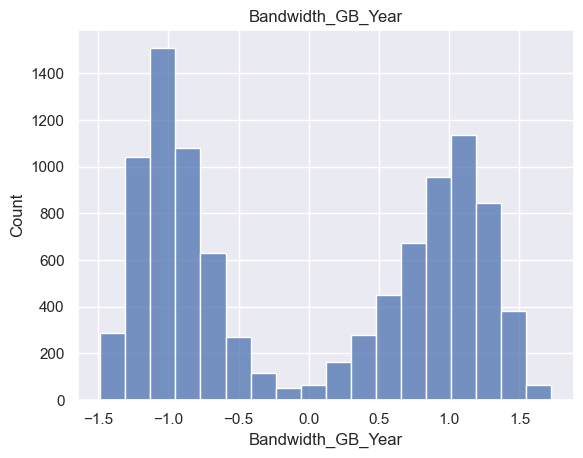

In [86]:
#let's make a new dataframe to hold all of our z scores.
zscore_df = KNN_df.copy(deep=True)

#Get the z scores for values in numeric columns in zscore_df.
for col in zscore_df:
    if col in num_cols:
        zscore_df[col] = stats.zscore(KNN_df[col])

#Visualize the z scores of each of our numerical columns as a histogram. We could use our grid function,
#but it may be better to have a higher level visual fidelity so we can see finer details in our outliers.
if show_vis == 'y':
    for col in num_cols:
        sns.histplot(data = zscore_df, x = col)
        plt.title(col)
        plt.show()

Now we have a more complete representation of outliers contained across our quantitative features. Our plans for handling these features will mirror our outlined plans after we partially assessed the data in section D2, but we can now decide how to proceed with the Children, Age, Income, Tenure, and Bandwidth_GB_Year features. These features all have varying sums of outliers that do not appear to be data entry errors, so we will defer to our earlier logic of preserving the outliers separately and median imputing them in our cleaned dataset for these five features. To accomplish this, we will run code nearly identical to when we used in our assessment process. Our filtering criteria will again be z scores above three or below negative three standard deviations relative to the mean of the data (Larose & Larose, 2019, p. 41). We will also create a running total of outliers in order to verify our median imputation later.

In [87]:
#Make a list of outlier columns, then filter the columns for outliers and print the totals.
outlier_cols = ['Lat', 'Lng', 'Population','Children','Income','Email','Contacts','Yearly_equip_failure','MonthlyCharge']
outlier_total = 0
for col in outlier_cols:
    out_sum = (np.logical_or(zscore_df[col]>3,  zscore_df[col]<-3)).sum()
    print(col + ' total outliers = ' + str(out_sum))
    outlier_total += out_sum

print('Total outliers = ' + str(outlier_total))

Lat total outliers = 150
Lng total outliers = 102
Population total outliers = 219
Children total outliers = 202
Income total outliers = 180
Email total outliers = 12
Contacts total outliers = 165
Yearly_equip_failure total outliers = 94
MonthlyCharge total outliers = 3
Total outliers = 1127


Now that we have a total sum of outliers and a clear numeric reference of the affected data, we will preserve the outliers in place in a separate dataframe, format the outlier dataframe to preserve their indexing using the CaseOrder column, fill all non-outlier values with NaN, and then drop all other unnecessary columns from the dataframe.

In [88]:

#Copy KNN_df to a new dataframe to hold our outliers.
outlier_df = KNN_df.copy(deep=True)
#Set all values in the dataframe to NaN so we can replace them with our outliers.
outlier_df[:] = np.nan

#Place every outlier in the appropriate row and column, along with its unique CaseOrder value.
for col in outlier_cols:
    outlier_df.loc[np.logical_or(zscore_df[col]>3,  zscore_df[col]<-3), col] = KNN_df.loc[np.logical_or(zscore_df[col]>3,  zscore_df[col]<-3), col]
    outlier_df.loc[np.logical_or(zscore_df[col]>3,  zscore_df[col]<-3), 'CaseOrder'] = KNN_df.loc[np.logical_or(zscore_df[col]>3,  zscore_df[col]<-3), 'CaseOrder']

#Drop every column not in outlier_cols or the CaseOrder column
for col in outlier_df.columns:
    if col not in outlier_cols and col != 'CaseOrder':
        outlier_df.drop(col, axis=1, inplace=True)

#drop all blank rows in outlier_df
outlier_df.dropna(axis=0, how='all', inplace=True)
#Now get the info of our dataframe
print(outlier_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 9996
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             984 non-null    float64
 1   Lat                   150 non-null    float64
 2   Lng                   102 non-null    float64
 3   Population            219 non-null    float64
 4   Children              202 non-null    float64
 5   Income                180 non-null    float64
 6   Email                 12 non-null     float64
 7   Contacts              165 non-null    float64
 8   Yearly_equip_failure  94 non-null     float64
 9   MonthlyCharge         3 non-null      float64
dtypes: float64(10)
memory usage: 84.6 KB
None


Now we have a dataframe containing all of our outliers in place with their CaseOrder numbers, including those with multiple missing values in a single row, with no unnecessary columns. If we need them for future analysis, we can quickly place them in their appropriate rows or columns this way. To be safe, we will also check for any duplicate rows.

In [89]:
#Check for duplicates
print(outlier_df.duplicated().value_counts())
print(outlier_df.info())

False    984
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 9996
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             984 non-null    float64
 1   Lat                   150 non-null    float64
 2   Lng                   102 non-null    float64
 3   Population            219 non-null    float64
 4   Children              202 non-null    float64
 5   Income                180 non-null    float64
 6   Email                 12 non-null     float64
 7   Contacts              165 non-null    float64
 8   Yearly_equip_failure  94 non-null     float64
 9   MonthlyCharge         3 non-null      float64
dtypes: float64(10)
memory usage: 84.6 KB
None


In [90]:
#Now export the 984 rows containing outliers to their own csv file to preserve them according to our plan.
outlier_df.to_csv('outlier_df.csv', index=False)

We will delay exporting our completed outlier dataframe to a .csv file until the end of our data cleaning process for the purpose of organization, as we will not be able to export the rest of our data until that time anyway. 

At this point we can filter and impute the medians of all 7 of our columns. First we will need 2 variables to hold the sum of all the median values across features before and after imputing. Then we make a loop wherein for each column, we will find the column's median before imputation and store it as a variable (col_med). Next, we sum the number of instances the median appears in the column and store it as pre_median_sum. Then we add pre_median_sum to the running total of all of our median variables that we described before the loop (pre_median_sumsum). For visualization, we print the pre_median_sum along with its column, then we filter for outliers and replace them with col_med using their corresponding z_score values stored in zscore_df. Next we count the number of median values in the column after imputation, taking care to use col_med in case our measures of center have shifted during imputation, and store it as post_median_sum. Last, we add post_median_sum to our running total of medians after imputation (post_median_sumsum) and compare our sums of sums both before and after imputation with print functions. Their difference should be the same as the value stored in outlier_total.

In [91]:
pre_median_sumsum = 0
post_median_sumsum = 0

for col in outlier_cols:
    col_med = KNN_df[col].median()
    pre_median_sum = (KNN_df[col] == KNN_df[col].median()).sum()
    pre_median_sumsum += pre_median_sum
    print('median sum for ' + col + ' before imputing = ' + str(pre_median_sum))
    KNN_df.loc[np.logical_or(zscore_df[col]>3,  zscore_df[col]<-3), col] = col_med
    post_median_sum = (KNN_df[col] == col_med).sum()
    post_median_sumsum += post_median_sum
    print('median sum for ' + col + ' after imputing = ' + str(post_median_sum))

print('Grand total before = ' + str(pre_median_sumsum))
print('Grand total after = ' + str(post_median_sumsum))
print('Total imputed values = ' + str(post_median_sumsum - pre_median_sumsum))


median sum for Lat before imputing = 1
median sum for Lat after imputing = 151
median sum for Lng before imputing = 1
median sum for Lng after imputing = 103
median sum for Population before imputing = 2
median sum for Population after imputing = 221
median sum for Children before imputing = 2482
median sum for Children after imputing = 2684
median sum for Income before imputing = 2
median sum for Income after imputing = 182
median sum for Email before imputing = 1308
median sum for Email after imputing = 1320
median sum for Contacts before imputing = 3673
median sum for Contacts after imputing = 3838
median sum for Yearly_equip_failure before imputing = 6719
median sum for Yearly_equip_failure after imputing = 6813
median sum for MonthlyCharge before imputing = 1
median sum for MonthlyCharge after imputing = 4
Grand total before = 14189
Grand total after = 15316
Total imputed values = 1127


A result of 1127 means that all of our 1127 outliers have been successfully imputed. Before we move on to PCA, let's check the dataframe to make sure our column lengths are correct. They should still be 9989 long.

In [92]:
#Print the column name if it is not 9989 rows long.
for col in KNN_df.columns:
    if len(KNN_df[col]) != 9989:
        print(col + ' is not 9989')

With that, our data cleaning process is complete. The only piece left is to organize all of our data for export. We have previously taken care of our numeric outliers in their own .csv file, but we will need to perform some operations before we can export our cleaned dataset. This will join our encoded datasets with our unencoded sets so that we easily perform future analyses.

In [93]:
#Copy all clean natively numeric columns from KNN_df to df, and then drop them from KNN_df.
for col in num_cols:
    df[col] = KNN_df[col]
    KNN_df.drop(columns=col, inplace=True)
#Check columns in df. We should see the new ones included in the list
print(df.columns)


Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')


Our nominally encoded columns will require an extra step. We are fortunate in that there were no values to impute for missingness or outliers in these columns, so all we need to do is add our encoded columns to the original dataframe for export. To do this, we will make a dictionary to link the encoded columns to their source column for ease of string manipulation. Then we will stage all of the columns that we need to add in KNN before finally adding them to df, contextually creating or overwriting columns as necessary. This will complete our data cleaning operations, and we can export the dataset to a csv file.

In [94]:
#First we make a dictionary of the new columns and their original column names
onehot_pairs = {'Bank Transfer(automatic)' : 'PaymentMethod',
                      'Credit Card (automatic)' : 'PaymentMethod',
                      'Electronic Check' : 'PaymentMethod',
                      'Mailed Check' : 'PaymentMethod',
                      'Male' : 'Gender',
                      'Female' : 'Gender',
                      'Prefer not to answer' : 'Gender',
                      'Divorced' : 'Marital',
                      'Married' : 'Marital',
                      'Never Married' : 'Marital',
                      'Separated' : 'Marital',
                      'Widowed' : 'Marital',
                      'DSL' : 'InternetService',
                      'Fiber Optic' : 'InternetService',
                      'None' : 'InternetService',
                      }


In [95]:
#For every key in the dictionary,  we will add the value to the column name, and begin editing the string for consistency.
for key in onehot_pairs.keys():
    KNN_df.rename(columns={key : onehot_pairs[key] + ' ' + key}, inplace=True)   
#Now we will manipulate all of the column names in the dataframe to remove spaces and replace them with underscores. 
for col in KNN_df.columns:
    KNN_df.rename(columns={col : col.replace(' ', '_')}, inplace=True)
#Let's also rename the Bank Transfer(automatic) so it has an underscore before the opening parentheses, like the Credit Card (automatic) column for consistency.
KNN_df.rename(columns={'PaymentMethod_Bank_Transfer(automatic)' : 'PaymentMethod_Bank_Transfer_(automatic)'}, inplace=True)

In [96]:
#Next, we copy our ordinally encoded categorical columns from Num_df to KNN_df, 
# rename them for clarity, and then drop them from Num_df.  
for col in Num_df:
    if col in ord_enc_cols:
        KNN_df[str(col + '_Num')] = Num_df[col]
        Num_df.drop(columns=col, inplace=True)
    else:
        Num_df.drop(columns=col, inplace=True) 

#Now copy and replace every remaining column from KNN_df to df
for col in KNN_df:
    print(col)
    df[col] = KNN_df[col]

Unnamed:_0
CaseOrder
Customer_id
Interaction
City
State
County
Zip
Area
Timezone
Job
Education
Employment
Churn
Techie
Contract
Port_modem
Tablet
Phone
Multiple
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
item1
item2
item3
item4
item5
item6
item7
item8
PaymentMethod_Bank_Transfer_(automatic)
PaymentMethod_Credit_Card_(automatic)
PaymentMethod_Electronic_Check
PaymentMethod_Mailed_Check
Gender_Female
Gender_Male
Gender_Prefer_not_to_answer
Marital_Divorced
Marital_Married
Marital_Never_Married
Marital_Separated
Marital_Widowed
InternetService_DSL
InternetService_Fiber_Optic
InternetService_None
Customer_id_Num
Interaction_Num
City_Num
State_Num
County_Num
Area_Num
Timezone_Num
Job_Num
Education_Num
Employment_Num
Churn_Num
Techie_Num
Contract_Num
Port_modem_Num
Tablet_Num
Phone_Num
Multiple_Num
OnlineSecurity_Num
OnlineBackup_Num
DeviceProtection_Num
TechSupport_Num
StreamingTV_Num
StreamingMovies_Num
PaperlessBilling_Num


D5: CLEAN DATA

The cleaned dataset will now be exported to a csv file, named 'df.csv', and our preserved outliers will be exported in the same fashion as 'outlier_df.csv'. Both files will be submitted for evaluation along with this Jupyter notebook file via the WGU submission portal.

In [97]:
#Export the dataframe to a csv file for future use.
df.to_csv('df.csv', index=False)
#Export the outlier dataframe to a separate csv file for preservation.
outlier_df.to_csv('outlier_df.csv', index=False)

#As a final check, we will print out some information about our dataframe to verify that it has been cleaned.

print('---df info---')
print(df.info())
print('---Duplicates---')
print(df.duplicated().value_counts())
print('---Nullity---')
print(str(df.isnull().sum().sum()) + ' total null values')

---df info---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 0 to 9999
Data columns (total 92 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               9989 non-null   int64  
 1   CaseOrder                                9989 non-null   int64  
 2   Customer_id                              9989 non-null   object 
 3   Interaction                              9989 non-null   object 
 4   City                                     9989 non-null   object 
 5   State                                    9989 non-null   object 
 6   County                                   9989 non-null   object 
 7   Zip                                      9989 non-null   int64  
 8   Lat                                      9989 non-null   float64
 9   Lng                                      9989 non-null   float64
 10  Population                        

D6:LIMITATIONS <br>
AND <br>
D7:IMPACT OF LIMITATIONS

There are significant limitations in the outcome of this data cleaning process, with a potential to impact any analysis performed using our chosen research question from part A. 

Fortunately for us, we did not find any duplicate rows or unique values through our detection methods. However, more advanced methods of string comparison would enable us to explore an issue related to duplicate values that may be present in features such as County, City, and Job. As our procedure currently stands, we lack an effective way to detect and compare and group highly similar categorical values of those features. Relating to our research question, this limits our ability to ensure that correlations derived from these features can be calculated accurately based on those categorical values.

Second, the base dataset contains a significant number of missing values across multiple dissimilar feature types. Running the following code on our raw dataset returns a total of 7896 out of 10,000 rows with at least one missing value, and a sum total of 13906 missing values across all features.

In [98]:
missing_rows = 0
for i in range(len(raw_df)):
    if raw_df.iloc[i].isnull().sum() > 0:
        #print(i)
        missing_rows += 1

print(missing_rows)
print(raw_df.isnull().sum().sum())


7867
13906


In addition, multiple features have sums of missing values that account for upward of 20% of the total sample size within that feature. We can mitigate some of the effects of this with imputation and interpolation as we have elected to do, but we are still building on a significant amount of incomplete data for these features, meaning that we are still skewing our data, and by extension, any inferences that future analysis can derive from that data. If our research question seeks to find the strongest correlations with customer churn from every variable in the dataset, then this degree of missingness would almost certainly have a negative effect on such an analysis.

With regards to outliers, we have elected to isolate and preserve the outliers of most of our features before mitigating them through median imputation. We have also opted to retain the outliers of several features directly in our cleaned dataset that we deem to be important aspects of their features' respective distributions. We can justify this approach as an attempt to preserve as much original data as possible. However, while effectively splitting our data into two discrete sets does allow us to explore our research question on both and compare the results, we now also have to develop a strategy to weight the outputs of any analysis between both so that we can select which inferences are most likely to be accurate between them. This would introduce a large amount of complexity to any effective methods of answering our research question.

E1: PRINCIPAL COMPONENTS

We will only be using natively quantitative features for our Principal Component Analysis (PCA). We will generate a new dataframe, then populate it with these features. Then we will normalize our data, determine how many total components can be generated based on these features, and then move forward with the PCA.

In [99]:
#We will start by making a new dataframe to hold our PCA values.
PCA_df = pd.DataFrame()

#Copy our natively numeric columns over to our new dataframe from our completed df.
for col in num_cols:
    PCA_df[col] = df[col]

#Normalize our data.
pca_norm = (PCA_df - PCA_df.mean()) / PCA_df.std()

#Return the number of components that will be generated in our analysis.
pca = PCA(n_components=PCA_df.shape[1])
pca.fit(pca_norm)
print(pca)


PCA(n_components=13)


It looks like we have 13 principal components. We should create a loading matrix to explore them. The following code will take our number of components and generate our loading matrix. 

In [100]:

loadings = pd.DataFrame(pca.components_.T,
     columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9', 'PC10', 'PC11', 'PC12', 'PC13'],
     index=PCA_df.columns)

print(loadings)

                           PC1       PC2       PC3       PC4       PC5  \
Lat                  -0.013290 -0.683874 -0.073507 -0.061876  0.038294   
Lng                   0.009197 -0.136077  0.028200  0.136564 -0.576917   
Population           -0.018529  0.681531  0.051452  0.010263  0.060113   
Children              0.001144 -0.029961  0.061028  0.584795 -0.280306   
Age                  -0.007983 -0.017647 -0.034658 -0.506044 -0.220417   
Income               -0.001673 -0.100867 -0.110730 -0.200635  0.177547   
Outage_sec_perweek    0.018559 -0.086313  0.689915 -0.051047  0.093270   
Email                -0.018603  0.140028  0.074547 -0.024282 -0.455820   
Contacts              0.001811  0.079060  0.045629 -0.526940 -0.069337   
Yearly_equip_failure  0.009622 -0.025501  0.102023  0.231038  0.528507   
Tenure                0.705085  0.009595 -0.051503 -0.011238 -0.002577   
MonthlyCharge         0.045770 -0.061915  0.690750 -0.068608 -0.052447   
Bandwidth_GB_Year     0.706613  0.0069

E2: CRITERIA USED

Now we are ready to perform our PCA. We will create a second dataframe to store the transformed data, generate a covariance matrix, then apply that matrix in conjunction with generated eigenvectors to return the eigenvalues of our components. Then we will determine how many components have an eigenvalue above one using a scree plot. This will serve as our criteria for selection, and these components will be the ones we recommend to the organization for retention and future use in analysis.

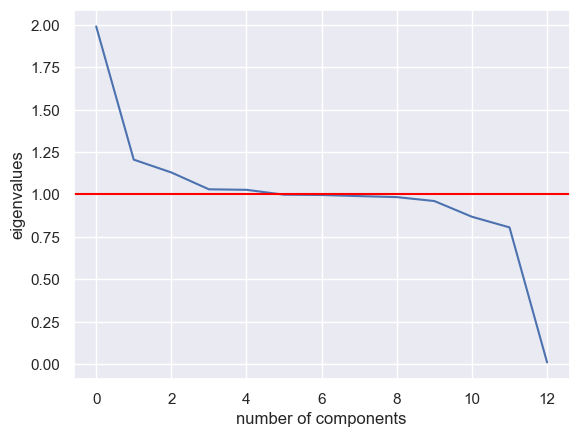

In [101]:
#Now we can perform the PCA.
PCA_df2 = pd.DataFrame(pca.transform(pca_norm), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'])
#Generate our covariance matrix.
cov_matrix = np.dot(pca_norm.T, pca_norm) / PCA_df.shape[0]
#Generate our eigenvalues using our covariance matrix and pca object.
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]
#Code paraphrased from (Larose & Larose, 2019, p. 179-181)

#Visualize the eigenvalues to determine how many components we want to use 
# and also create a horizontal line at y=1 to determine our cutoff point.
if show_vis == 'y':
    plt.plot(eigenvalues)
    plt.xlabel('number of components')
    plt.ylabel('eigenvalues')
    plt.axhline(y=1, color='red')
    plt.show()


Interestingly, our scree plot contains quite a few eigenvalues very near to 1, so we should find an alternative to visual confirmation when choosing how many principal components are appropriate. Because we are limiting the number of principal components to those that are equal to or above 1, we can see exactly what our eigenvalues are, and how many components to use, by simply printing them.

In [102]:
print(eigenvalues)

[1.9907146990586535, 1.2051733085305585, 1.129655242196907, 1.0302749550056274, 1.0273089961630841, 0.9985399807728592, 0.9968047700749952, 0.990194005747455, 0.9843935943894225, 0.9611527438981011, 0.868511015362788, 0.8057952644987167, 0.010179992726094461]


It looks like we will ultimately use 5 principal components with a cutoff at an eigenvalue of 1.

E3: BENEFITS

The major organizational advantage of using PCA is that it reduces a large amount of data and model complexity and multicollinearity by reducing the dimensionality of the quantitative data in a dataset such as this (Larose & Larose, 2019, p. 175). In fact, we drop the number of quantitative columns from 13 to 5 when we perform PCA, which drastically lowers the amount of computational power and working time necessary to perform different analytical processes, which becomes even more important if an organization needs to scale those procedures up to accommodate much larger datasets. Because PCA also performs the task of feature extraction, the principal components also serve to improve the quality of machine learning models by effectively culling variables that have low correlative value to the rest of the data, saving enormous amounts of processing time and improving the accuracy of any predictions and inferences made by machine learning models regarding this data.

F: VIDEO

A brief demonstration video of this code, including a description of the software environment used to develop it, has been recorded via Panopto and submitted for evaluation in conjunction with this Jupyter notebook per instructions in the WGU submission portal.

The software used in the production of this code is as follows:

Operating System: Windows 10 Professional<br>
Code Editor and Integrated Development Environment: Microsoft Visual Studio Code<br>
Browser used for research and submission: Google Chrome<br>
Spreadsheet editor: OpenOffice Calc


G: SOURCES OF THIRD-PARTY CODE

Donthi, S. "Dealing with Missing Data in Python". DataCamp, https://app.datacamp.com/learn/courses/dealing-with-missing-data-in-python

Larose, C. D., & Larose, D. T. (2019). Data science using Python and R. ISBN-13: 978-1-119-52684-1.

H: SOURCES

Donthi, S. "Dealing with Missing Data in Python". DataCamp, https://app.datacamp.com/learn/courses/dealing-with-missing-data-in-python

Larose, C. D., & Larose, D. T. (2019). Data science using Python and R. ISBN-13: 978-1-119-52684-1.